In [1]:
from model import BaseModel
from env.light_env import LightEnv
from utils.light_env_utils import *
from structure_learning import *
from true_causal_model import TrueCausalModelEnv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creo pgm a partir de ambiente de Gym

### Grafo causal

{'effect_0': [], 'effect_1': ['cause_2'], 'effect_2': ['cause_0', 'cause_1', 'cause_4'], 'effect_3': [], 'effect_4': ['cause_3']}


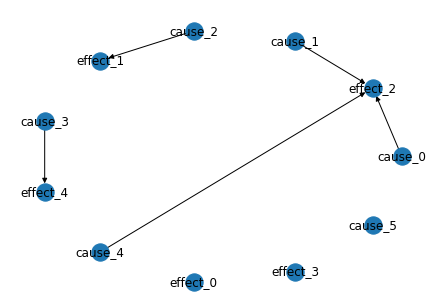

/home/ivan/Documentos/playing-against-nature/venv/lib/python3.7/site-packages/pgmpy/factors/discrete/CPD.py:504: UserWarning: Same ordering provided as current
  warn("Same ordering provided as current")


{'effect_0': [], 'effect_1': ['cause_2'], 'effect_2': ['cause_0', 'cause_1', 'cause_4'], 'effect_3': [], 'effect_4': ['cause_3']}


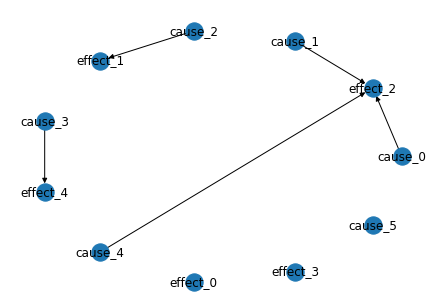

<Figure size 432x288 with 0 Axes>

In [2]:
num = 5
env = LightEnv(num=num, structure="many_to_one")
env.keep_struct = False
env.reset()
env.keep_struct = True
lights_on_model = generate_model_from_env(env)
lights_off_model = generate_model_from_env(env, lights_off=True)


### Variables objetivo y de intervención

In [3]:
for target in lights_on_model.get_target_variable():
    print(target)
for target in lights_off_model.get_target_variable():
    print(target)

effect_0
effect_1
effect_2
effect_3
effect_4
effect_0
effect_1
effect_2
effect_3
effect_4


In [4]:
for treatment in lights_on_model.get_intervention_variables():
    print(treatment)
for treatment in lights_off_model.get_intervention_variables():
    print(treatment)

cause_0
cause_1
cause_2
cause_3
cause_4
cause_5
cause_0
cause_1
cause_2
cause_3
cause_4
cause_5


### Tablas de probabilidad condicional

In [5]:
for table in lights_on_model.pgmodel.get_cpds():
    print(table)

+-------------+-----+
| effect_0(0) | 0.5 |
+-------------+-----+
| effect_0(1) | 0.5 |
+-------------+-----+
+-------------+------------+------------+
| cause_2     | cause_2(0) | cause_2(1) |
+-------------+------------+------------+
| effect_1(0) | 1.0        | 0.0        |
+-------------+------------+------------+
| effect_1(1) | 0.0        | 1.0        |
+-------------+------------+------------+
+-------------+------------+------------+------------+------------+------------+------------+------------+------------+
| cause_0     | cause_0(0) | cause_0(0) | cause_0(0) | cause_0(0) | cause_0(1) | cause_0(1) | cause_0(1) | cause_0(1) |
+-------------+------------+------------+------------+------------+------------+------------+------------+------------+
| cause_1     | cause_1(0) | cause_1(0) | cause_1(1) | cause_1(1) | cause_1(0) | cause_1(0) | cause_1(1) | cause_1(1) |
+-------------+------------+------------+------------+------------+------------+------------+------------+----------

In [6]:
for table in lights_off_model.pgmodel.get_cpds():
    print(table)

+-------------+-----+
| effect_0(0) | 0.5 |
+-------------+-----+
| effect_0(1) | 0.5 |
+-------------+-----+
+-------------+------------+------------+
| cause_2     | cause_2(0) | cause_2(1) |
+-------------+------------+------------+
| effect_1(0) | 0.0        | 1.0        |
+-------------+------------+------------+
| effect_1(1) | 1.0        | 0.0        |
+-------------+------------+------------+
+-------------+------------+------------+------------+------------+------------+------------+------------+------------+
| cause_0     | cause_0(0) | cause_0(0) | cause_0(0) | cause_0(0) | cause_0(1) | cause_0(1) | cause_0(1) | cause_0(1) |
+-------------+------------+------------+------------+------------+------------+------------+------------+------------+
| cause_1     | cause_1(0) | cause_1(0) | cause_1(1) | cause_1(1) | cause_1(0) | cause_1(0) | cause_1(1) | cause_1(1) |
+-------------+------------+------------+------------+------------+------------+------------+------------+----------

In [7]:
variables = sorted(lights_on_model.get_graph_toposort())
causal_order = variables
invalid_edges = []
causes = lights_on_model.get_intervention_variables()
invalid_edges = generate_invalid_edges_light(variables, causes)

In [8]:
response = action_simulator(env, "cause_2")

In [9]:
for k in response:
    print("{}: {}".format(k, response[k]))

cause_5: 0
reward: -1.4142135623730951
done: False
cause_0: 0
cause_1: 0
cause_2: 1
cause_3: 0
cause_4: 0
effect_0: 0
effect_1: 1
effect_2: 0
effect_3: 0
effect_4: 0
change_to: on


In [10]:
print(env._get_obs()[:num])

[0. 1. 0. 0. 0.]


### Datos generados de exploración aleatoria

In [11]:
number_of_interactions = 100
data_on = dict()
data_off = dict()
data_on, data_off = explore_light_env(env, number_of_interactions)
df_on = pd.DataFrame.from_dict(data_on)
df_off = pd.DataFrame.from_dict(data_off)
print(df_on.shape)
print(df_off.shape)

(57, 11)
(57, 11)


### Creencias generadas aleatoriamente

In [12]:
connection_tables = create_pij(variables, causal_order, invalid_edges)
adj_list = create_graph_from_beliefs(variables, connection_tables)
ebunch, nodes = adj_list_to_ebunch_and_nodes(adj_list)
for pair in connection_tables:
    print("{} -> {} : {:.2f}".format(pair[0], pair[1], connection_tables[pair]))

cause_0 -> effect_0 : 0.50
cause_0 -> effect_1 : 0.50
cause_0 -> effect_2 : 0.50
cause_0 -> effect_3 : 0.50
cause_0 -> effect_4 : 0.50
cause_1 -> effect_0 : 0.50
cause_1 -> effect_1 : 0.50
cause_1 -> effect_2 : 0.50
cause_1 -> effect_3 : 0.50
cause_1 -> effect_4 : 0.50
cause_2 -> effect_0 : 0.50
cause_2 -> effect_1 : 0.50
cause_2 -> effect_2 : 0.50
cause_2 -> effect_3 : 0.50
cause_2 -> effect_4 : 0.50
cause_3 -> effect_0 : 0.50
cause_3 -> effect_1 : 0.50
cause_3 -> effect_2 : 0.50
cause_3 -> effect_3 : 0.50
cause_3 -> effect_4 : 0.50
cause_4 -> effect_0 : 0.50
cause_4 -> effect_1 : 0.50
cause_4 -> effect_2 : 0.50
cause_4 -> effect_3 : 0.50
cause_4 -> effect_4 : 0.50
cause_5 -> effect_0 : 0.50
cause_5 -> effect_1 : 0.50
cause_5 -> effect_2 : 0.50
cause_5 -> effect_3 : 0.50
cause_5 -> effect_4 : 0.50


### Modelo a partir de creencias

   cause_5  cause_0  cause_1  cause_2  cause_3  cause_4  effect_0  effect_1  \
0        0        0        1        1        0        0         0         1   
1        1        1        1        0        0        0         0         0   
2        1        1        1        0        0        0         0         0   
3        0        1        1        0        0        1         0         0   
4        0        0        1        0        1        1         0         0   

   effect_2  effect_3  effect_4  
0         1         0         0  
1         0         0         0  
2         0         0         0  
3         1         0         0  
4         0         0         1  
    cause_5  cause_0  cause_1  cause_2  cause_3  cause_4  effect_0  effect_1  \
44        0        0        0        0        1        1         0         0   
0         0        0        1        1        0        0         0         1   
39        0        0        0        1        1        0         0         1   
1

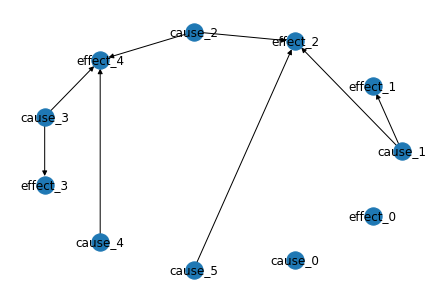

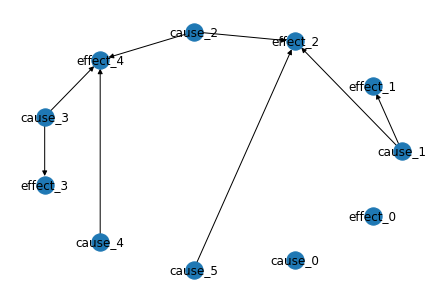

<Figure size 432x288 with 0 Axes>

In [13]:
approx_model_on = generate_approx_model_from_graph(ebunch, nodes, df_on)
approx_model_off = generate_approx_model_from_graph(ebunch, nodes, df_off)
unknown_model_on = deepcopy(lights_on_model)
unknown_model_off = deepcopy(lights_off_model)
unknown_model_on.reset(approx_model_on, ebunch, nodes)
unknown_model_off.reset(approx_model_off, ebunch, nodes)
unknown_model_on.show_graph()
unknown_model_off.show_graph()

In [14]:
rounds = 1000
connection_probas = dict()
local_data_on = deepcopy(data_on)
local_data_off = deepcopy(data_off)
for rnd in range(rounds):
    action_idx = env.action_space.sample()
    action = "cause_{}".format(action_idx)
    nature_response = action_simulator(env, action)
    done = nature_response.pop("done", None)
    nature_response.pop("reward", None)
    change_to = nature_response.pop("change_to", None)
    ##Aquí debo preguntar qué modelo usar si el approx con OFF o con ON
    if change_to == "on":    
        connection_tables = update_connection_beliefs(unknown_model_on, connection_tables, adj_list, df_on, nature_response)
    if change_to == "off":    
        connection_tables = update_connection_beliefs(unknown_model_off, connection_tables, adj_list, df_off, nature_response)
    else:
        if np.random.rand() < 0.5:
            connection_tables = update_connection_beliefs(
            unknown_model_off, connection_tables, adj_list, df_on, nature_response)
        else:
            connection_tables = update_connection_beliefs(
            unknown_model_on, connection_tables, adj_list, df_off, nature_response)
    for pair in connection_tables:
        print("{} -> {} : {:.2f}".format(pair[0], pair[1], connection_tables[pair]))
    update_prob_measures(connection_probas, connection_tables)
    adj_list = create_graph_from_beliefs(variables, connection_tables)
    ebunch, nodes = adj_list_to_ebunch_and_nodes(adj_list)
    if change_to == "on" or change_to == "nothing":
        for k in nature_response:
            local_data_on[k].append(nature_response[k])
        df_on = pd.DataFrame.from_dict(local_data_on)
        approx_model = generate_approx_model_from_graph(ebunch, nodes, df_on)
        unknown_model_on.reset(approx_model, ebunch, nodes)
    if change_to == "off" or change_to == "nothing":
        for k in nature_response:
            local_data_off[k].append(nature_response[k])
        df_off = pd.DataFrame.from_dict(local_data_off)
        approx_model = generate_approx_model_from_graph(ebunch, nodes, df_off)
        unknown_model_off.reset(approx_model, ebunch, nodes)

cause_0 : ['effect_0']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.0047556209442052,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.0047556209442052
Pij = 0.006584705922745662,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.0047556209442052
Pij = 0.006944716299474259,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052005,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.005387486664064633
Pij = 0.0047556209442052005,  P~ij = 0.0047556209442052
Pij = 0.004687683502145125,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.001678454450895953
Pij = 0.004703361373389758,  P~ij = 0.0047556209442052
Pij = 0.0047556209442052,  P~ij = 0.0

Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.004542681071790484
Pij = 0.0074236972252155016,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.006455388891491739
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.004242112700123144,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.001075898148581957
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.014847394450431003,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij = 0.00645538889149174,  P~ij = 0.00645538889149174
Pij

Pij = 0.01806386210252531,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.011289913814078317
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.009170883836666694
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.017213798003582935,  P~ij = 0.018063862102525308
Pij = 0.018063862102525308,  P~ij = 0.018063862102525308
Pij = 0.018063862102525304,  P~ij = 0.018063862102525308
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.37
cause_0 -> effect_2 : 0.19
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.72
cause_1 -> effect_2 : 0.32
cause_1 -> effect_3 : 0.64
cause_1 -> effect

Pij = 0.009566705193044934,  P~ij = 0.009566705193044936
Pij = 0.009566705193044934,  P~ij = 0.01133286615176092
Pij = 0.009566705193044936,  P~ij = 0.009566705193044934
Pij = 0.009566705193044936,  P~ij = 0.009566705193044934
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.37
cause_0 -> effect_2 : 0.19
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.72
cause_1 -> effect_2 : 0.43
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.37
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 0.99
cause_2 -> effect_2 : 0.59
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.70
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.90
cause_3 -> effect_2 : 0.22
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.23
cause_4 -> effect_2 : 0.99
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.41
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.75
cause_5 -> effect_2 : 0.31
cause_5 -> effect

Pij = 0.013289542630516385,  P~ij = 0.013289542630516385
Pij = 0.013289542630516385,  P~ij = 0.01993431394577458
Pij = 0.013289542630516385,  P~ij = 0.013289542630516385
Pij = 0.013289542630516385,  P~ij = 0.013289542630516385
Pij = 0.013289542630516385,  P~ij = 0.013289542630516385
Pij = 0.013289542630516385,  P~ij = 0.013289542630516385
Pij = 0.013289542630516385,  P~ij = 0.01063163410441311
Pij = 0.013289542630516385,  P~ij = 0.013289542630516385
Pij = 0.013289542630516384,  P~ij = 0.013289542630516385
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.37
cause_0 -> effect_2 : 0.14
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.72
cause_1 -> effect_2 : 0.68
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.37
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.39
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.70
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.90
cause_3 -> effect_2 : 0.25
cau

Pij = 0.01840682277180552,  P~ij = 0.01840682277180552
Pij = 0.01840682277180552,  P~ij = 0.01840682277180552
Pij = 0.01840682277180552,  P~ij = 0.01840682277180552
Pij = 0.01840682277180552,  P~ij = 0.01840682277180552
Pij = 0.01840682277180552,  P~ij = 0.01840682277180552
Pij = 0.01840682277180552,  P~ij = 0.01840682277180552
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_2', 'effect_4']
cause_4 : ['effect_0', 'effect_1', 'effect_2', 'effect_4']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.025379847199191504,  P~ij = 0.025379847199191504
Pij = 0.025379847199191497,  P~ij = 0.025379847199191504
Pij = 0.025379847199191504,  P~ij = 0.010151938879676602
Pij = 0.025379847199191504,  P~ij = 0.025379847199191504
Pij = 0.025379847199191504,  P~ij = 0.025379847199191504
Pij = 0.025379847199191504,  P~ij = 0.02537

Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.05047335303532852,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.010094670607065708
Pij = 0.010094670607065708,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.012618338258832133
Pij = 0.010094670607065707,  P~ij = 0.010094670607065708
Pij = 0.010094670607065707,  P~ij = 0.010094670607065708
Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.00865257480605632
Pij = 0.010094670607065707,  P~ij = 0.004588486639575322
Pij = 0.010094670607065707,  P~ij = 0.010094670607065708
Pij = 0.010094670607065707,  P~ij = 0.010094670607065708
Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij = 0.010094670607065707
Pij = 0.010094670607065707,  P~ij

Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.03154584564708033
Pij = 0.05047335303532852,  P~ij = 0.05047335303532853
Pij = 0.05047335303532852,  P~ij = 0.05047335303532853
Pij = 0.05047335303532852,  P~ij = 0.05047335303532854
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532853,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.029060415383977033
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532853,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.006309169129416067
Pij = 0.05047335303532852,  P~ij = 0.05047335303532853
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.05047335303532852,  P~ij = 0.05047335303532852
Pij = 0.

Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.0
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
Pij = 0.003344127908349037,  P~ij = 0.003344127908349037
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.56
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.13
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.26
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effe

Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.01008376228648068
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
Pij = 0.015845912164469643,  P~ij = 0.015845912164469643
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_2', 'ef

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_2']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_2']
cause_5 : ['effect_2']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.005427652233296928
Pij = 0.005427652233296928,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.005427652233296928
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.005427652233296928
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.0054276522332969285
Pij = 0.0054276522332969285,  P~ij = 0.

Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.004958484843727026
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.02288531466335551
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.016528282812423422,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.033056565624846844
Pij = 0.033056565624846844,  P~ij = 0.014324511770766967
Pij = 0.033056565624846844,  P~i

Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.015467812710690277
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.01933476588836284,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.01933476588836284,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.008140954058258038
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.005155937570230092
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362845,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij = 0.019334765888362842
Pij = 0.019334765888362842,  P~ij

Pij = 0.020246709223529048,  P~ij = 0.02024670922352904
Pij = 0.02024670922352904,  P~ij = 0.015845250696674903
Pij = 0.02024670922352904,  P~ij = 0.02024670922352904
Pij = 0.020246709223529048,  P~ij = 0.02024670922352904
Pij = 0.02024670922352905,  P~ij = 0.02024670922352904
Pij = 0.02024670922352904,  P~ij = 0.02024670922352905
Pij = 0.02024670922352904,  P~ij = 0.020246709223529048
Pij = 0.02024670922352904,  P~ij = 0.02024670922352904
Pij = 0.02024670922352904,  P~ij = 0.02024670922352904
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.56
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.13
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.26
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.68
cause_3 -> effect_2 : 0.03
cause_3 -> effe

Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.011736834490740741
Pij = 0.019561390817901238,  P~ij = 0.019561390817901234
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.009780695408950619
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.005334924768518518
Pij = 0.009780695408950619,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~ij = 0.019561390817901238
Pij = 0.019561390817901238,  P~

Pij = 0.02121916290018665,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.008487665160074659
Pij = 0.021219162900186647,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.021219162900186647
Pij = 0.02121916290018665,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.021219162900186647
Pij = 0.02121916290018665,  P~ij = 0.02121916290018665
Pij = 0.021219162900186647,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.021219162900186647
Pij = 0.02121916290018665,  P~ij = 0.01308030589737533
Pij = 0.02121916290018665,  P~ij = 0.02121916290018665
Pij = 0.021219162900186647,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.016975330320149317
Pij = 0.021219162900186647,  P~ij = 0.02121916290018665
Pij = 0.021219162900186647,  P~ij = 0.02121916290018665
Pij = 0.021219162900186647,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.02121916290018665
Pij = 0.02121916290018665,  P~ij = 0.02121916290018664

Pij = 0.02293645161018413,  P~ij = 0.018766187681059743
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
Pij = 0.02293645161018413,  P~ij = 0.02293645161018413
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.56
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.07
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.15
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.68
cause_3 -> effect_2 : 0.03
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.043996506690329076,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.03259000495579932
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.04399650669032908
Pij = 0.04399650669032908,  P~ij = 0.028632647211166547
Pij = 0.04

Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.0036811401907625215,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.0024540934605083472
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.001963274768406678
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.003681140190762521
Pij = 0.003681140190762521,  P~ij = 0.0013804275715359456
Pij = 0.003681140190762521, 

Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.012192494893032264,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.01155078463550425
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.004572185584887099
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
Pij = 0.02438498978606453,  P~ij = 0.02438498978606453
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> 

Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.020460892765489944
Pij = 0.03031243372665177,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.016534054759991867
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~ij = 0.030312433726651763
Pij = 0.030312433726651763,  P~i

Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
Pij = 0.02517486094680422,  P~ij = 0.01936527765138786
Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
Pij = 0.025174860946804222,  P~ij = 0.02517486094680422
Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
Pij = 0.02517486094680422,  P~ij = 0.02517486094680422
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.04
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.15
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.52
cause_3 -> effect_2 : 0.01
cause_3 -> effect_

Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529094,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.0019672837599484104
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529094
Pij = 0.005246090026529094,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529094
Pij = 0.005246090026529093,  P~ij = 0.0014307518254170254
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.0034973933510193947
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529093
Pij = 0.005246090026529093,  P~ij = 0.005246090026529094
Pij = 0.005246090026529094, 

Pij = 0.03613805254171219,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.02662803871494583
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.03613805254171219
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.03613805254171219,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.03613805254171219
Pij = 0.03613805254171219,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.021010495663786162
Pij = 0.0361380525417122,  P~ij = 0.03613805254171219
Pij = 0.03613805254171219,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.024726035949592558
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.03613805254171219,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij = 0.0361380525417122
Pij = 0.0361380525417122,  P~ij =

Pij = 0.026865375581752955,  P~ij = 0.02238781298479413
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
Pij = 0.026865375581752955,  P~ij = 0.026865375581752955
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.04
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.15
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.52
cause_3 -> effect_2 : 0.01
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause

Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.024114278413682376
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.020203854887139293
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.03250185351409364,  P~ij = 0.03250185351409364
Pij = 0.

Pij = 0.04879781913702556,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702556,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.03297149941690916
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702556,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.03935307994921416
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702556,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
Pij = 0.04879781913702555,  P~ij = 0.04879781913702555
cause_0 : 

Pij = 0.03993913825805687,  P~ij = 0.039939138258056874
Pij = 0.03993913825805688,  P~ij = 0.039939138258056874
Pij = 0.039939138258056874,  P~ij = 0.039939138258056874
Pij = 0.039939138258056874,  P~ij = 0.039939138258056874
Pij = 0.039939138258056874,  P~ij = 0.039939138258056874
Pij = 0.03993913825805687,  P~ij = 0.039939138258056874
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.04
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.15
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.52
cause_3 -> effect_2 : 0.01
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.13
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> ef

Pij = 0.01249147958409092,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.0069397108800505125
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.012491479584090923,  P~ij = 0.012491479584090923
Pij = 0.01249147958409092,  P~ij = 0.012491479584090923
Pij = 0.012491479584090923,  P~ij = 0.006939710880050513
Pij = 0.012491479584090923,  P~ij = 0

Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.011547611735950689
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.0333597672371909
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.008578225860991943
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.02284915564191157
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.03335976723719089,  P~ij = 0.03335976723719089
Pij = 0.0

Pij = 0.03735473306426126,  P~ij = 0.03735473306426126
Pij = 0.03735473306426126,  P~ij = 0.03735473306426126
Pij = 0.03735473306426125,  P~ij = 0.03735473306426126
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.04
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.15
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.52
cause_3 -> effect_2 : 0.01
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.13
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.14
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'e

Pij = 0.02032447657282676,  P~ij = 0.020324476572826763
Pij = 0.020324476572826763,  P~ij = 0.020324476572826763
Pij = 0.020324476572826763,  P~ij = 0.02032447657282676
Pij = 0.020324476572826763,  P~ij = 0.020324476572826763
Pij = 0.020324476572826763,  P~ij = 0.02032447657282676
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.04
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.15
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.52
cause_3 -> effect_2 : 0.01
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.13
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effec

Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.0010348224319573253
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.0016672139181534687
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.01909717760793973
Pij = 0.015004925263381218,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.030009850526762437,  P~ij = 0.030009850526762437
Pij = 0.015004925263381218,  P

Pij = 0.03786486683408148,  P~ij = 0.03786486683408148
Pij = 0.03786486683408148,  P~ij = 0.03786486683408148
Pij = 0.03786486683408148,  P~ij = 0.03786486683408148
Pij = 0.03786486683408149,  P~ij = 0.03786486683408148
Pij = 0.03786486683408148,  P~ij = 0.03786486683408148
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.04
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.04
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.13
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0

Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0019953648
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.002201781848275862
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.00419026608
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.005187948479999999
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0079814592
Pij = 0.0079814592,  P~ij = 0.0053209728
Pij = 0.0079814592,  P~ij = 0.0079814592

Pij = 0.025236639171971446,  P~ij = 0.02523663917197145
Pij = 0.025236639171971456,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.013166942176680754
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.008075724535030866
Pij = 0.02523663917197145,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
Pij = 0.02523663917197145,  P~ij = 0.025236639171971446
Pij = 0.025236639171971456,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
Pij = 0.025236639171971446,  P~ij = 0.025236639171971446
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effec

Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.00949837901771647,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.0073535837556514575
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
Pij = 0.009498379017716468,  P~ij = 0.009498379017716468
cause_0 -> effect_0 : 0.90
caus

Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_2', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.017202578081183754
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779152,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.03249375859779153
Pij = 0.03249375859779153,  P~ij = 0.0194962551

Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.003021763771494832
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.0075544094287370795
Pij = 0.007554409428737078,  P~ij = 0.0037772047143685393
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737079
Pij = 0.007554409428737078,  P~ij = 0.003462437654837828
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.007554409428737078
Pij = 0.007554409428737078,  P~ij = 0.0075544094287370795
Pij = 0.007554409428737078, 

Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.009442781203733387
Pij = 0.012018085168387944,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.024036170336775887
Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.024036170336775887
Pij = 0.012018085168387944,  P~ij = 0.024036170336775894
Pij = 0.024036170336775887,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.010515824522339451
Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.003204822711570119
Pij = 0.024036170336775894,  P~ij = 0.024036170336775887
Pij = 0.024036170336775887,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~ij = 0.024036170336775894
Pij = 0.024036170336775894,  P~

Pij = 0.028633632334672934,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.022270602926967836
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.014316816167336469
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672934,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~ij = 0.02127069830575704
Pij = 0.028633632334672938,  P~ij = 0.028633632334672934
Pij = 0.028633632334672934,  P~ij = 0.028633632334672938
Pij = 0.028633632334672938,  P~i

Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.01925642928582352
Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
Pij = 0.02995444555572548,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.023600472256026135
Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
Pij = 0.02995444555572548,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.02995444555572548
Pij = 0.02995444555572548,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
Pij = 0.029954445555725472,  P~ij = 0.029954445555725472
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 :

Pij = 0.00633343658971735,  P~ij = 0.00633343658971735
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.02
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.14
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effec

Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.0022162710813286206
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.003239165426557215
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.005820970810666054
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 0.01052728763631095,  P~ij = 0.01052728763631095
Pij = 

Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.011059864308271222
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.014668872661496569
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
Pij = 0.0199077557548882,  P~ij = 0.0199077557548882
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> ef

Pij = 0.026490106751847865,  P~ij = 0.026490106751847865
Pij = 0.026490106751847865,  P~ij = 0.026490106751847865
Pij = 0.026490106751847865,  P~ij = 0.026490106751847865
Pij = 0.026490106751847865,  P~ij = 0.026490106751847865
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.02
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effec

Pij = 0.015872168755400328,  P~ij = 0.015872168755400325
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.010581445836933552
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.008402912870506056
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.010052373545086873
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~ij = 0.015872168755400325
Pij = 0.015872168755400328,  P~ij = 0.015872168755400328
Pij = 0.015872168755400328,  P~

Pij = 0.0289638341330697,  P~ij = 0.028963834133069705
Pij = 0.0289638341330697,  P~ij = 0.024507859651058977
Pij = 0.028963834133069705,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.028963834133069705,  P~ij = 0.0289638341330697
Pij = 0.028963834133069705,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.016370862770865486
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.007240958533267426
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.028963834133069705,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.0289638341330697
Pij = 0.0289638341330697,  P~ij = 0.028963834133069705
Pij = 0.0289638341330697,  P

Pij = 0.017352131596801847,  P~ij = 0.01311990437806969
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
Pij = 0.017352131596801847,  P~ij = 0.017352131596801847
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.02
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_2', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.040580845453184015,  P~ij = 0.04058084545318402
Pij = 0.040580845453184015,  P~ij = 0.040580845453184015
Pij = 0.040580845453184015,  P~ij = 0.014950837798541481
Pij = 0.040580845453184015,  P~ij = 0.040580845453184015
Pij = 0.040580845453184015,  P~ij = 0.040580845453184015
Pij = 0.04058084545318402,  P~ij = 0.040580845453184015
Pij = 0.040580845453184015,  P~ij = 0.040580845453184015
Pij = 0.040580845453184015,  P~ij = 0.010520959932306968
Pij = 0.040580845453184015,  P~ij = 0.040580845453184015
Pij = 0.040580845453184015,  P~ij = 0.040580845453184015
Pij = 0.04058084545318402,  P~ij = 0.040580845453184015
Pij = 0.040580845453184015,  P~ij = 0.026394045823209117
Pij = 0.040580845453184015,  P~ij = 0.04058084545

Pij = 0.03460457522386885,  P~ij = 0.022391195733091614
Pij = 0.03460457522386885,  P~ij = 0.03460457522386885
Pij = 0.034604575223868846,  P~ij = 0.03460457522386885
Pij = 0.03460457522386886,  P~ij = 0.03460457522386885
Pij = 0.03460457522386885,  P~ij = 0.03460457522386885
Pij = 0.03460457522386886,  P~ij = 0.03460457522386885
Pij = 0.03460457522386885,  P~ij = 0.03460457522386885
Pij = 0.03460457522386885,  P~ij = 0.03460457522386885
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.13
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.02
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_

Pij = 0.015712944670451458,  P~ij = 0.015712944670451454
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.010836513565828593
Pij = 0.015712944670451458,  P~ij = 0.015712944670451454
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451454,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.008493483605649438
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.015712944670451454
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.006285177868180582
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.015712944670451454
Pij = 0.015712944670451458,  P~ij = 0.015712944670451458
Pij = 0.015712944670451458,  P~ij = 0.015712944670451454
Pij = 0.015712944670451458,  P~

Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02134262960789353
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.016801644584937464
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.007178884504473278
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.02392961501491093,  P~ij = 0.02392961501491093
Pij = 0.

Pij = 0.006585657785763033,  P~ij = 0.00259435003681574
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.0025088220136240125
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.002522166811568821
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~ij = 0.006585657785763033
Pij = 0.006585657785763033,  P~

Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.0018955146955265884
Pij = 0.004603392831993145,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993145,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.0016572214195175313
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.001000737572172423
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  P~ij = 0.004603392831993144
Pij = 0.004603392831993144,  

Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.019911825212361723
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.013867163987180487
Pij = 0.02773432797436097,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.02773432797436097
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
Pij = 0.027734327974360973,  P~ij = 0.027734327974360973
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 :

Pij = 0.021677584516424233,  P~ij = 0.021677584516424233
Pij = 0.021677584516424233,  P~ij = 0.021677584516424233
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.01
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effec

Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.027663232145787153
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.018101684214371493
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.032089349289113105,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.017827416271729502
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.0320893492891131
Pij = 0.0320893492891131,  P~ij = 0.02

Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.00941129589293,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.008196935132551934
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.005907820779503502
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij = 0.009411295892929997
Pij = 0.009411295892929997,  P~ij =

Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.0049349890239386235
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.0038492914386721254
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.01283097146224042,  P~ij = 0.01283097146224042
Pij = 0.012830971462240416,  P~ij = 0.01283097146224042
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_

Pij = 0.016460070846331044,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.00493802125389931
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.00855923684009214
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.00905303896548207
Pij = 0.016460070846331044,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.01646007084633104,  P~ij = 0.01646007084633104
Pij = 0.

Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0016670582027421461
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
Pij = 0.0066682328109685845,  P~ij = 0.0066682328109685845
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.01
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause

cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.00918482122737891
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.00918482122737891
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.017713583795659325
Pij = 0.017713583795659325,  P~ij = 0.00590452793188644
Pij = 0.0177135

Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02231355390785384
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.014895804906053776
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.029007620080209986,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.01726644052393451
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.02900762008020999
Pij = 0.02900762008020999,  P~ij = 0.020237874474565112
Pij = 0

Pij = 0.021848960779397554,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.012266083244574066
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.014735345641919279
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
Pij = 0.02184896077939755,  P~ij = 0.02184896077939755
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 :

Pij = 0.02269508240036937,  P~ij = 0.022695082400369375
Pij = 0.022695082400369375,  P~ij = 0.022695082400369375
Pij = 0.022695082400369375,  P~ij = 0.022695082400369375
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3', 'effect_4']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.01489597069532086,  P~ij = 0.01489597069532086
Pij = 0.01489597069532086,  P~ij = 0.01489597069532086
Pij = 0.01489597069532086,  P~ij = 0.005095989974715031
Pij = 0.01489597069532086,  P~ij = 0.01489597069532086
Pij = 0.01489597069532086,  P~ij = 0.01489597069532086
Pij = 0.01489597069532086,  P~ij = 0.01489597069532086
Pij = 0.01489597069532086,  P~ij = 0.01489597069532086
Pij = 0.01489597069532086,  P~ij = 0.009682380951958563
Pij = 0.01489597069532086,  P~ij = 0

Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.0008806732903492516
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.0010029890251199813
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.004728376832708482
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij = 0.00902690122607983,  P~ij = 0.00902690122607983
Pij =

Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.0032799147769164514
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.0037114825107212473
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.023506055901234578
Pij = 0.02350605590123457,  P~ij = 0.013790219462057617
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij = 0.02350605590123457,  P~ij = 0.02350605590123457
Pij 

Pij = 0.035940423144109925,  P~ij = 0.035940423144109925
Pij = 0.035940423144109925,  P~ij = 0.035940423144109925
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.01
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effec

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.0043396718301718755
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.004959624948767858
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.010682269120423079
Pij = 0.010682269120423079,  P~ij = 0.0054653469918443665
Pij = 0.01

Pij = 0.012023710943013601,  P~ij = 0.005290432814925984
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.005186698838162731
Pij = 0.0120237109430136,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013603,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.004872353454031656
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij = 0.00661304101865748
Pij = 0.012023710943013601,  P~ij = 0.012023710943013601
Pij = 0.012023710943013601,  P~ij 

Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.04220332103594401,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.030840888449343688
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.026614706959604318
Pij = 0.04220332103594401,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.04220332103594401,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.02921768379411507
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.042203321035944
Pij = 0.042203321035944,  P~ij = 0.03084088844934369
Pij = 0.0422033

Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.01649960575466021,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.005499868584886738
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
Pij = 0.016499605754660213,  P~ij = 0.016499605754660213
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54

cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.008057518352479523
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.009357118086750413
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.018129416293078925
Pij = 0.018129416293078925,  P~ij = 0.01039775346220702

Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.012144877533912659
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.012814939742680255
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.009322979518680012
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~ij = 0.021860779561042792
Pij = 0.021860779561042792,  P~

Pij = 0.01946829079876273,  P~ij = 0.007571001977296618
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.013119935103514014
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
Pij = 0.01946829079876273,  P~ij = 0.01946829079876273
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effe

Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.02755593580016587
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.02935306204800278
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0.03857831012023222
Pij = 0.03857831012023222,  P~ij = 0

Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.00817666101982708,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.003983501522479859
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.0045693105699033685
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.004672377725615473
Pij = 0.00817666101982708,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827077,  P~ij = 0.008176661019827077
Pij = 0.008176661019827081,  P~ij = 0.008176661019827077
Pij = 0.00817666101982708,  P~ij

Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452516,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.00936401664787567
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.01439946642031208
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452516,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij = 0.020879226309452513
Pij = 0.020879226309452513,  P~ij

Pij = 0.026911005988214266,  P~ij = 0.017125185628863625
Pij = 0.026911005988214266,  P~ij = 0.026911005988214266
Pij = 0.02691100598821427,  P~ij = 0.026911005988214266
Pij = 0.026911005988214266,  P~ij = 0.026911005988214266
Pij = 0.026911005988214266,  P~ij = 0.026911005988214266
Pij = 0.02691100598821427,  P~ij = 0.026911005988214266
Pij = 0.026911005988214266,  P~ij = 0.026911005988214266
Pij = 0.02691100598821427,  P~ij = 0.026911005988214266
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.01693930943104844,  P~ij = 0.01693930943104844
Pij = 0.01693930943104844,  P~ij = 0.01693930943104844
Pij = 0.01693930943104844,  P~ij = 0.0033878618862096875
Pij = 0.01693930943104844,  

cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.011532436593406411
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01153243659340641
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.01887125988011958
Pij = 0.01887125988011958,  P~ij = 0.007233982954045838
Pij = 0.018871259880119583,  P~ij = 0.01887125

Pij = 0.008474227003724478,  P~ij = 0.006355670252793358
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.0033896908014897915
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.0047298011183578475
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  P~ij = 0.005826031065060578
Pij = 0.008474227003724478,  P~ij = 0.008474227003724478
Pij = 0.008474227003724478,  

Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.01551782733518564
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.009750785321504417
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
Pij = 0.028365920935285574,  P~ij = 0.028365920935285574
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> 

Pij = 0.024272296742929824,  P~ij = 0.024272296742929824
Pij = 0.024272296742929824,  P~ij = 0.024272296742929824
Pij = 0.024272296742929824,  P~ij = 0.024272296742929824
Pij = 0.024272296742929824,  P~ij = 0.024272296742929824
Pij = 0.024272296742929824,  P~ij = 0.024272296742929824
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> ef

Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.015744856862357836
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.015744856862357836
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.013713740675782484
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~ij = 0.021867856753274774
Pij = 0.021867856753274774,  P~

Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.013195153804247703
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.025730549918283017,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.01645067945595144
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.008233775973850567
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0.02573054991828302,  P~ij = 0.02573054991828302
Pij = 0

Pij = 0.03139271792580247,  P~ij = 0.03139271792580246
Pij = 0.03139271792580247,  P~ij = 0.00888473148843466
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.01345402196820106
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.021582493573989198
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.03139271792580247,  P~ij = 0.012074122279154794
Pij = 0.03139271792580247,  P~ij = 0.03139271792580247
Pij = 0.

Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.012802025889387404
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.011967111157470834
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.02117258127860225
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.01184656333445602
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij = 0.021172581278602248
Pij = 0.021172581278602248,  P~ij

Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.016178312046118765
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.027378681924200985
Pij = 0.027378681924200985,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.027378681924200985,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.016489433431621046
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.027378681924200985
Pij = 0.02737868192420098,  P~ij = 0.009126227308066993
Pij = 0.02737868192420098,  P~ij = 0.027378681924200985
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098
Pij = 0.027378681924200985,  P~ij = 0.02737868192420098
Pij = 0.027378681924200985,  P~ij = 0.02737868192420098
Pij = 0.02737868192420098,  P~ij = 0.02737868192420098


Pij = 0.014017288692441874,  P~ij = 0.005391264881708412
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441872,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.00843227522904706
Pij = 0.014017288692441872,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.014017288692441872
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441872,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.005485026010085948
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~ij = 0.0038228969161205094
Pij = 0.014017288692441874,  P~ij = 0.014017288692441874
Pij = 0.014017288692441874,  P~

Pij = 0.0118634596921504,  P~ij = 0.006541533848942742
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.007765173616680262
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.011863459692150401,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
Pij = 0.0118634596921504,  P~ij = 0.0118634596921504
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_

Pij = 0.016925104640166843,  P~ij = 0.016925104640166843
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.00542226962781116
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.005311611063978279
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij = 0.02168907851124464
Pij = 0.02168907851124464,  P~ij 

Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.013519645887029207
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.017575539653137972,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.013875426041951027
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.017575539653137972,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.006519958258422149
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.017575539653137972
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij = 0.01757553965313797,  P~ij = 0.01757553965313797
Pij 

Pij = 0.02129070262471621,  P~ij = 0.02129070262471621
Pij = 0.02129070262471621,  P~ij = 0.02129070262471621
Pij = 0.02129070262471621,  P~ij = 0.02129070262471621
Pij = 0.021290702624716214,  P~ij = 0.02129070262471621
Pij = 0.02129070262471621,  P~ij = 0.02129070262471621
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 

Pij = 0.010201425557450667,  P~ij = 0.010201425557450669
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.007695812262638224
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450669,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.0074349372706843855
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450669,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.005525772176952445
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P~ij = 0.010201425557450667
Pij = 0.010201425557450667,  P

Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.0051265102034349225
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.005954844316722621
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.010273817608506498
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P~ij = 0.015681090034036234
Pij = 0.015681090034036234,  P

Pij = 0.022101223261527865,  P~ij = 0.022101223261527865
Pij = 0.022101223261527865,  P~ij = 0.022101223261527865
Pij = 0.02210122326152786,  P~ij = 0.022101223261527865
Pij = 0.022101223261527865,  P~ij = 0.022101223261527865
Pij = 0.022101223261527865,  P~ij = 0.022101223261527865
Pij = 0.022101223261527865,  P~ij = 0.022101223261527865
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> 

Pij = 0.01258352842107868,  P~ij = 0.008045206695443747
Pij = 0.012583528421078684,  P~ij = 0.01258352842107868
Pij = 0.01258352842107868,  P~ij = 0.01258352842107868
Pij = 0.01258352842107868,  P~ij = 0.01258352842107868
Pij = 0.01258352842107868,  P~ij = 0.012583528421078682
Pij = 0.012583528421078682,  P~ij = 0.01258352842107868
Pij = 0.01258352842107868,  P~ij = 0.01258352842107868
Pij = 0.01258352842107868,  P~ij = 0.01258352842107868
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effec

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_0', 'effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.0232846734626643
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.022521241545855632
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.030528794095493184
Pij = 0.030528794095493184,  P~ij = 0.012033247

Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.023226014186554705
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.012890140865683814
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.017519103640516533
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.03130462781666069
Pij = 0.03130462781666069,  P~ij = 0.02149272954576704
Pij = 0

Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.010554412526723952
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.018717335682551284
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
Pij = 0.027080400561989085,  P~ij = 0.027080400561989085
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_0', 'effect_1']
effect_0 : []
effect_1 : []
effect_2 

Pij = 0.02293437347193154,  P~ij = 0.022934373471931543
Pij = 0.022934373471931543,  P~ij = 0.022934373471931543
Pij = 0.022934373471931543,  P~ij = 0.022934373471931543
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.014435529489014593
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.016114079429597684
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij = 0.019247372652019458
Pij = 0.019247372652019458,  P~ij

Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.02730740668425,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.0182049377895
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.02730740668425,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.027307406684249996
Pij = 0.027307406684250003,  P~ij = 0.01653828855525
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.027307406684249996
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.015772381446937503
Pij = 0.027307406684250003,  P~ij = 0.02730740668425
Pij = 0.027307406684250003,  P~ij = 0.027307406684250003
Pij = 0.027307406684250003,  P~ij = 0.02048055501318

Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164284,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.011397203999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.014993954769230771
Pij = 0.020164284,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164283999999998
Pij = 0.020164284,  P~ij = 0.020164283999999998
Pij = 0.020164283999999998,  P~ij = 0.020164284
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 

Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.00940386284609262
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.011830666161213296
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0.021573567705741894
Pij = 0.021573567705741894,  P~ij = 0

Pij = 0.013877849311347897,  P~ij = 0.013877849311347895
Pij = 0.013877849311347897,  P~ij = 0.00566442829034608
Pij = 0.013877849311347897,  P~ij = 0.013877849311347897
Pij = 0.013877849311347895,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.005742558335730163
Pij = 0.013877849311347895,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.013877849311347897
Pij = 0.013877849311347895,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.013877849311347895
Pij = 0.013877849311347895,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.005564880169401878
Pij = 0.013877849311347897,  P~ij = 0.013877849311347897
Pij = 0.013877849311347895,  P~ij = 0.013877849311347897
Pij = 0.013877849311347897,  P~ij = 0.004785465279775136
Pij = 0.013877849311347897,  P~i

Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.004669359447668882
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.003018982401510052
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0058366993095861006
Pij = 0.0058366993095861006,  P~ij = 0.0019674267335683484

Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.01562783430558914,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.007032525437515114
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.01562783430558914
Pij = 0.015627834305589144,  P~ij = 0.008037171928588702
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.010001813955577052
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.015627834305589144
Pij = 0.015627834305589144,  P~ij = 0.01562783430558914
Pij = 0.015627834305589144,  P~ij = 0.01562783430558914
Pij = 0.015627834305589144,  P~ij =

Pij = 0.028646370140776152,  P~ij = 0.02864637014077615
Pij = 0.028646370140776152,  P~ij = 0.017951725288219724
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.02864637014077616,  P~ij = 0.028646370140776152
Pij = 0.02864637014077616,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.017490812537877747
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.02864637014077616,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.023226786600629313
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.02864637014077616,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.028646370140776152
Pij = 0.028646370140776152,  P~ij = 0.02864637014077616
Pij = 0.02864637014077616,  P~ij = 0.

Pij = 0.023249778553468686,  P~ij = 0.019076741377205074
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
Pij = 0.023249778553468686,  P~ij = 0.023249778553468686
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
caus

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_4']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_1', 'effect_2', 'effect_3', 'effect_4']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.027625842883421
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.024717859422008267
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.03202086334214707
Pij = 0.03202086334214707,  P~ij = 0.0172112

Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.025059064250792334
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.016410535000715418
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~ij = 0.015661915156745206
Pij = 0.029235574959257722,  P~ij = 0.029235574959257722
Pij = 0.029235574959257712,  P~ij = 0.029235574959257722
Pij = 0.029235574959257722,  P~

Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.03286205362820353
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.02210719971351874
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.021431774105350132
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
Pij = 0.032862053628203526,  P~ij = 0.032862053628203526
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> e

Pij = 0.008656761784516218,  P~ij = 0.008656761784516218
Pij = 0.008656761784516218,  P~ij = 0.008656761784516218
Pij = 0.008656761784516218,  P~ij = 0.008656761784516218
Pij = 0.008656761784516218,  P~ij = 0.008656761784516218
Pij = 0.008656761784516218,  P~ij = 0.008656761784516218
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> ef

Pij = 0.028858289450938178,  P~ij = 0.010004207009658568
Pij = 0.028858289450938178,  P~ij = 0.028858289450938178
Pij = 0.028858289450938174,  P~ij = 0.028858289450938178
Pij = 0.028858289450938174,  P~ij = 0.028858289450938178
Pij = 0.028858289450938178,  P~ij = 0.028858289450938178
Pij = 0.02885828945093818,  P~ij = 0.028858289450938178
Pij = 0.028858289450938178,  P~ij = 0.028858289450938178
Pij = 0.028858289450938178,  P~ij = 0.028858289450938178
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.016187595122090264,  P~ij = 0.016187595122090264
Pij = 0.016187595122090264,  P~ij = 0.016187595122090264
Pij = 0.016187595122090264,  P~ij = 0.01416414573182898
Pij = 0.016187595122090264,  P~ij = 0.016187595122090264
Pij = 0.016187595122090264

Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.010920203058552954
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290236,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.011760218678441646
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.010058081764456668
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~ij = 0.025480473803290233
Pij = 0.025480473803290233,  P~

Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.005246641453420169
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.006627336572741265
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.004418224381827511
Pij = 0.011992323322103243,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.011992323322103244,  P~ij = 0.01199232332210324
Pij = 0.01199232332210324,  P~ij = 0.01199232332210324
Pij = 0.011992323322103243,  P~ij = 0.01199232332210324
Pij 

Pij = 0.02929600472263974,  P~ij = 0.029296004722639747
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.01738705971343659
Pij = 0.02929600472263974,  P~ij = 0.029296004722639747
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.023436803778111793
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.029296004722639744
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
Pij = 0.02929600472263974,  P~ij = 0.02929600472263974
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -

Pij = 0.020539916518433437,  P~ij = 0.020539916518433437
Pij = 0.020539916518433437,  P~ij = 0.020539916518433437
Pij = 0.020539916518433437,  P~ij = 0.020539916518433437
Pij = 0.020539916518433437,  P~ij = 0.020539916518433437
Pij = 0.020539916518433437,  P~ij = 0.020539916518433437
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> ef

Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.017281358537061413
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.030242377439857474,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.015681232746592763
Pij = 0.03024237743985747,  P~ij = 0.030242377439857474
Pij = 0.030242377439857474,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.01719664599521307
Pij = 0.030242377439857474,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.03024237743985747,  P~ij = 0.03024237743985747
Pij = 0.030242377439857474,  P~ij = 0.03024237743985747
Pij

Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.00834010080432635
Pij = 0.02157547816771382,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.02157547816771382,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.009770027849530788
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.014201580566090107
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.021575478167713824,  P~ij = 0.021575478167713824
Pij = 0.02157547816771382,  P~ij =

Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.006045132432584772
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.00849076224024512
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.013640896713836418
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~ij = 0.021335761526769786
Pij = 0.021335761526769786,  P~i

Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.009793967908097211
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.008795915940319686
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
Pij = 0.016062107369279426,  P~ij = 0.016062107369279426
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'eff

Pij = 0.028566489779245353,  P~ij = 0.028566489779245353
Pij = 0.028566489779245353,  P~ij = 0.028566489779245353
Pij = 0.02856648977924536,  P~ij = 0.028566489779245353
Pij = 0.028566489779245353,  P~ij = 0.028566489779245353
Pij = 0.02856648977924535,  P~ij = 0.028566489779245353
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effe

Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.013734657556363421
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.00813094128500623
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01081178621688939
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.01966553241024763
Pij = 0.01966553241024763,  P~ij = 0.014184974197555668
Pij = 0.

Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.00783627284590039
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.009747558905876093
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.006848839271568185
Pij = 0.016652079797538327,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.01665207979753833,  P~ij = 0.01665207979753833
Pij = 0.016652079797538327,  P~ij = 0.01665207979753833
Pij = 

Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.025224849441071746
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.023831190596300688
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
Pij = 0.03620507802130297,  P~ij = 0.03620507802130297
cause_0 

Pij = 0.02906966203213139,  P~ij = 0.019379774688087596
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
Pij = 0.02906966203213139,  P~ij = 0.02906966203213139
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2']
cause_5 : ['effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.023329457300846228
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.02502614510454413
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.029922564798911463
Pij = 0.029922564798911463,  P~ij = 0.01754952112678773
Pij = 0.029922564798911463,  P~ij = 0.029922564798

Pij = 0.021565880558607812,  P~ij = 0.015262007779937832
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.010012730259353626
Pij = 0.02156588055860781,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.013802163557508998
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.02156588055860781,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij = 0.015030765237817566
Pij = 0.021565880558607812,  P~ij = 0.021565880558607812
Pij = 0.021565880558607812,  P~ij

Pij = 0.03139700602926026,  P~ij = 0.031397006029260266
Pij = 0.03139700602926026,  P~ij = 0.01699687544441157
Pij = 0.03139700602926026,  P~ij = 0.031397006029260266
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.03139700602926026,  P~ij = 0.011603241358639663
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.03139700602926026,  P~ij = 0.03139700602926026
Pij = 0.031397006029260266,  P~ij = 0.03139700602926026
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.

cause_0 : ['effect_0', 'effect_1', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.023970554178648948,  P~ij = 0.023970554178648948
Pij = 0.023970554178648948,  P~ij = 0.023970554178648944
Pij = 0.023970554178648948,  P~ij = 0.014186654513894276
Pij = 0.023970554178648948,  P~ij = 0.023970554178648948
Pij = 0.023970554178648948,  P~ij = 0.023970554178648944
Pij = 0.023970554178648948,  P~ij = 0.023970554178648948
Pij = 0.023970554178648948,  P~ij = 0.023970554178648948
Pij = 0.023970554178648948,  P~ij = 0.012413322699657493
Pij = 0.023970554178648948,  P~ij = 0.023970554178648948
Pij = 0.023970554178648944,  P~ij = 0.023970554178648948
Pij = 0.023970554178648948,  P~ij = 0.023970554178648948
Pij = 0.023970554178648948,  P~ij = 0.0138291

Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.0068354808788404185
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.01920090824506571
Pij = 0.03271265849159343,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.03271265849159343,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.019581520928066483
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij = 0.032712658491593424
Pij = 0.032712658491593424,  P~ij

Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.01600822426584638
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.00766256374877248
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
Pij = 0.023466601480615717,  P~ij = 0.023466601480615717
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> e

Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.009820416065265042
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.015199426238895173
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~ij = 0.021667267191616515
Pij = 0.021667267191616515,  P~

Pij = 0.022851464991002875,  P~ij = 0.015081966894061903
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
Pij = 0.022851464991002875,  P~ij = 0.022851464991002875
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
caus

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.022064159790563163,  P~ij = 0.022064159790563163
Pij = 0.022064159790563167,  P~ij = 0.022064159790563163
Pij = 0.022064159790563163,  P~ij = 0.016046661665864125
Pij = 0.022064159790563163,  P~ij = 0.022064159790563163
Pij = 0.022064159790563167,  P~ij = 0.022064159790563163
Pij = 0.022064159790563163,  P~ij = 0.022064159790563163
Pij = 0.022064159790563163,  P~ij = 0.022064159790563163
Pij = 0.022064159790563163,  P~ij = 0.01858034508679003
Pij = 0.022064159790563163,  P~ij = 0.022064159790563163
Pij = 0.022064159790563167,  P~ij = 0.022064159790563163
Pij = 0.022064159790563163,  P~ij = 0.022064159790563163
Pij = 0.022064159790563163,  P~ij = 0.009866087711227432
Pij = 0.022064159790563

Pij = 0.005753025885634561,  P~ij = 0.004602420708507649
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.00259814072254464
Pij = 0.00575302588563456,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.00575302588563456
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.0021047655679150828
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~ij = 0.0028765129428172803
Pij = 0.005753025885634561,  P~ij = 0.005753025885634561
Pij = 0.005753025885634561,  P~i

Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.014697580705516496
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.012988559693247134
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.006698747428001521
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~ij = 0.019258898855504372
Pij = 0.019258898855504372,  P~

Pij = 0.03165233162688481,  P~ij = 0.01934309154976294
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.01956689591480152
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.021101554417923208
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.03165233162688481
Pij = 0.03165233162688481,  P~ij = 0.0316523316268848
Pij = 0.03

Pij = 0.012220389202951067,  P~ij = 0.012220389202951069
Pij = 0.012220389202951067,  P~ij = 0.012220389202951069
Pij = 0.012220389202951069,  P~ij = 0.012220389202951069
Pij = 0.012220389202951069,  P~ij = 0.012220389202951067
Pij = 0.012220389202951067,  P~ij = 0.012220389202951069
Pij = 0.012220389202951069,  P~ij = 0.012220389202951069
Pij = 0.01222038920295107,  P~ij = 0.012220389202951069
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 

Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.004719292105903605
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.004719292105903606
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.005193786149160218
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~ij = 0.012311196798009405
Pij = 0.012311196798009405,  P~

Pij = 0.014877184061835582,  P~ij = 0.004559137051207678
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.004628457263682181
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.004868896602055282
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~ij = 0.014877184061835582
Pij = 0.014877184061835582,  P~

Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.012965523352344467
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.00806480672009653
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.01294613710331285
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij = 0.018564272072675032
Pij = 0.018564272072675032,  P~ij

Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.01748337929941618
Pij = 0.029721744809007505,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.020210786470125103
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007505,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
Pij = 0.029721744809007498,  P~ij = 0.029721744809007498
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.0126949288246127,

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.010489138975393714
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.010213109002357036
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.03528164928086976
Pij = 0.03528164928086976,  P~ij = 0.020046391636857824
Pij = 0

Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.020925889341184327
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
Pij = 0.030583992114038627,  P~ij = 0.030583992114038627
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
c

Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.0030357784531806846
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.001998233918549312
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615825,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615826,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
Pij = 0.006314419182615824,  P~ij = 0.006314419182615824
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> e

Pij = 0.03219798614361866,  P~ij = 0.018782158583777554
Pij = 0.03219798614361867,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361867,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361867
Pij = 0.03219798614361866,  P~ij = 0.02135234870576817
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.02198886858588592
Pij = 0.03219798614361866,  P~ij = 0.03219798614361867
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361867,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361866
Pij = 0.03219798614361866,  P~ij = 0.03219798614361867
Pij = 0.03219798614361866,  P~ij = 0.03219798614361867
Pij = 0.0

Pij = 0.022915242363749953,  P~ij = 0.015276828242499964
Pij = 0.022915242363749953,  P~ij = 0.022915242363749953
Pij = 0.022915242363749946,  P~ij = 0.022915242363749953
Pij = 0.022915242363749953,  P~ij = 0.022915242363749953
Pij = 0.022915242363749953,  P~ij = 0.022915242363749953
Pij = 0.022915242363749953,  P~ij = 0.022915242363749953
Pij = 0.022915242363749953,  P~ij = 0.022915242363749953
Pij = 0.022915242363749953,  P~ij = 0.022915242363749953
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.018729057994398415,  P~ij = 0.018729057994398415
Pij = 0.018729057994398415,  P~ij = 0.018729057994398415
Pij = 0.018729057994398415,  P~ij = 0.00790132134138683
Pij = 0.018729057994398415,  P~ij 

Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.007417170917856552
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.028887928837967626,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.0073182753056184645
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.028887928837967626,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.017332757302780576
Pij = 0.028887928837967626,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.02888792883796763,  P~ij = 0.02888792883796763
Pij = 0.028887928837967626,  P~ij = 0.02888792883796763
Pij = 0.028887928837967626,  P~ij = 0.02888792883796763
P

Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.015626940465254376
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.015626940465254376,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.0035865109264518243
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.015626940465254376,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.010503353427466057
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
Pij = 0.01562694046525438,  P~ij = 0.01562694046525438
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause

Pij = 0.01462701399667068,  P~ij = 0.01462701399667068
Pij = 0.01462701399667068,  P~ij = 0.01462701399667068
Pij = 0.014627013996670683,  P~ij = 0.01462701399667068
Pij = 0.01462701399667068,  P~ij = 0.01462701399667068
Pij = 0.014627013996670683,  P~ij = 0.01462701399667068
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 :

cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.011218515285952628
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.011878427949832194
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.022437030571905256
Pij = 0.022437030571905256,  P~ij = 0.013724779339197366


Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.02481719462773721
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.020576179561398754
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.033524982216416935,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.021570337395058956
Pij = 0.033524982216416935,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.03352498221641693
Pij = 0.03352498221641693,  P~ij = 0.0235916541522934
Pij = 0

Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.009440295172668168
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.014765015742071607
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
Pij = 0.021795975619248564,  P~ij = 0.021795975619248564
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effec

Pij = 0.0222352495514529,  P~ij = 0.0222352495514529
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0

Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.012434480729169665
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.011860581618592604
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.012549177512889623
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~ij = 0.020287836979171553
Pij = 0.020287836979171553,  P~

Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.019750650594058436
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.019500757384333746
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.010564906641881061
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~ij = 0.033203992303054757
Pij = 0.033203992303054757,  P~

Pij = 0.02634786875730954,  P~ij = 0.02634786875730954
Pij = 0.02634786875730954,  P~ij = 0.02634786875730954
Pij = 0.02634786875730954,  P~ij = 0.02634786875730954
Pij = 0.02634786875730954,  P~ij = 0.02634786875730954
Pij = 0.02634786875730954,  P~ij = 0.02634786875730954
Pij = 0.026347868757309545,  P~ij = 0.02634786875730954
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 :

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.01569864405193485
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.015467781639406394
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.026295228786990876
Pij = 0.026295228786990876,  P~ij = 0.016855915889096715
Pij = 0.02629

Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.015910121419005035
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.015571608197324081
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.014726563606127833
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.0267755701929597
Pij = 0.0267755701929597,  P~ij = 0.021525458390418584
Pij = 0.0267755701929597,  P~ij = 0.02

Pij = 0.031343446340100424,  P~ij = 0.01670125242939657
Pij = 0.031343446340100424,  P~ij = 0.03134344634010042
Pij = 0.031343446340100424,  P~ij = 0.031343446340100424
Pij = 0.031343446340100424,  P~ij = 0.01044781544670014
Pij = 0.031343446340100424,  P~ij = 0.031343446340100424
Pij = 0.03134344634010042,  P~ij = 0.031343446340100424
Pij = 0.03134344634010042,  P~ij = 0.031343446340100424
Pij = 0.031343446340100424,  P~ij = 0.031343446340100424
Pij = 0.031343446340100424,  P~ij = 0.031343446340100424
Pij = 0.031343446340100424,  P~ij = 0.031343446340100424
Pij = 0.031343446340100424,  P~ij = 0.031343446340100424
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97


Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.0075639072944374405
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.012180560358383496
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
Pij = 0.01785082121487236,  P~ij = 0.01785082121487236
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
caus

Pij = 0.021284784000670975,  P~ij = 0.021284784000670975
Pij = 0.021284784000670978,  P~ij = 0.021284784000670975
Pij = 0.021284784000670975,  P~ij = 0.021284784000670975
Pij = 0.021284784000670975,  P~ij = 0.021284784000670975
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.018656308145344705,  P~ij = 0.0186563081453447
Pij = 0.018656308145344705,  P~ij = 0.018656308145344705
Pij = 0.018656308145344705,  P~ij = 0.011561655752044602
Pij = 0.018656308145344705,  P~ij = 0.018656308145344705
Pij = 0.018656308145344705,  P~ij = 0.0186563081453447
Pij = 0.018656308145344705,  P~ij = 0.018656308145344705
Pij = 0.018656308145344705,  P~ij = 0.018656308145344705
Pij = 0.018656308145344705,  P~ij = 0.011244898060207767
Pij 

Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.0037900653432644846
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.003744401905393828
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.007882237344325412
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P~ij = 0.013512406875986422
Pij = 0.013512406875986422,  P

Pij = 0.02260622342778089,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.02260622342778089
Pij = 0.02260622342778089,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.013579432822937828
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.02260622342778089,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.0053432891738391195
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.02260622342778089,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.02260622342778089,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 0.022606223427780892
Pij = 0.022606223427780892,  P~ij = 

Pij = 0.03650227985428971,  P~ij = 0.03650227985428971
Pij = 0.036502279854289714,  P~ij = 0.03650227985428971
Pij = 0.03650227985428971,  P~ij = 0.036502279854289714
Pij = 0.03650227985428971,  P~ij = 0.03650227985428971
Pij = 0.03650227985428971,  P~ij = 0.03650227985428971
Pij = 0.03650227985428971,  P~ij = 0.03650227985428971
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 

cause_0 : ['effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_1', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.004156003112688722
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.004265371615654215
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.010457040089990979
Pij = 0.010457040089990979,  P~ij = 0.005331040045877754
Pij = 0.010457040089990979,  P~ij = 0.0104570400

Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.013581851185232861
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.011995082623559417
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.007920077135728362
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~ij = 0.019523911078772244
Pij = 0.019523911078772244,  P~

Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.008853352001845852
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.009175292074640245
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.009492058110550445
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~ij = 0.016821368803507118
Pij = 0.016821368803507118,  P~

Pij = 0.02253213681084922,  P~ij = 0.02253213681084922
Pij = 0.02253213681084922,  P~ij = 0.02253213681084922
Pij = 0.02253213681084922,  P~ij = 0.02253213681084922
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'e

Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176195,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.018479275509562926
Pij = 0.026105643180176198,  P~ij = 0.026105643180176198
Pij = 0.026105643180176198,  P~ij = 0.0261056

Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.018508042323359376
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.017351289678149414
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.01706684230637647
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~ij = 0.028918816130249023
Pij = 0.028918816130249023,  P~i

Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.019037940411522635
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.02115924938271605
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209876,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.02303750772486772
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.03359636543209877,  P~ij = 0.03359636543209877
Pij = 0.0

Pij = 0.026230139900304796,  P~ij = 0.01808975165538262
Pij = 0.026230139900304796,  P~ij = 0.026230139900304796
Pij = 0.02623013990030479,  P~ij = 0.026230139900304796
Pij = 0.026230139900304796,  P~ij = 0.026230139900304796
Pij = 0.026230139900304796,  P~ij = 0.026230139900304796
Pij = 0.02623013990030479,  P~ij = 0.026230139900304796
Pij = 0.026230139900304796,  P~ij = 0.026230139900304796
Pij = 0.026230139900304796,  P~ij = 0.026230139900304796
cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.022553203803384162,  P~ij = 0.022553203803384162
Pij = 0.022553203803384162,  P~ij = 0.022553203803384162
Pij = 0.022553203803384162,  P~ij = 0.008012322403833844
Pij = 0.022553203803384162,  P~ij = 0.022553203803384162
Pij = 0.022553203803384162,

Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.006516224982274297
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.006516224982274298
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.010088081639224656
Pij = 0.0183419666167721,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.0183419666167721
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij = 0.018341966616772103
Pij = 0.018341966616772103,  P~ij =

Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.0165914033216195
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.013378800385458781
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.01875961436935404
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij = 0.026929123852782413
Pij = 0.026929123852782413,  P~ij 

Pij = 0.008059514045160374,  P~ij = 0.008059514045160374
Pij = 0.008059514045160376,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.005668229658134768
Pij = 0.008059514045160374,  P~ij = 0.008059514045160376
Pij = 0.008059514045160376,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.0038805067624846238
Pij = 0.008059514045160374,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.008059514045160376
Pij = 0.008059514045160376,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.008059514045160372
Pij = 0.008059514045160376,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.008059514045160374
Pij = 0.008059514045160376,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.005487328711598553
Pij = 0.008059514045160374,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P~ij = 0.008059514045160374
Pij = 0.008059514045160374,  P

Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.004455486645753435
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.0065944044772873805
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168148,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
Pij = 0.011746282975168146,  P~ij = 0.011746282975168146
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_

Pij = 0.022254539001164822,  P~ij = 0.022254539001164825
Pij = 0.022254539001164825,  P~ij = 0.022254539001164822
Pij = 0.022254539001164825,  P~ij = 0.022254539001164822
Pij = 0.022254539001164822,  P~ij = 0.022254539001164822
cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.012183240270417643,  P~ij = 0.012183240270417643
Pij = 0.012183240270417646,  P~ij = 0.012183240270417643
Pij = 0.012183240270417643,  P~ij = 0.0020617791226860633
Pij = 0.012183240270417643,  P~ij = 0.012183240270417643
Pij = 0.012183240270417643,  P~ij = 0.012183240270417643
Pij = 0.012183240270417643,  P~ij = 0.012183240270417643
Pij = 0.012183240270417643,  P~ij = 0.012183240270417646
Pij = 0.012183240270417643,  P~ij = 0.001942255695283973
Pij = 0.012183240270417643,  P~ij = 0.012183240

cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.01888091518249715
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.01888091518249715
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.030964700899295323
Pij = 0.030964700899295323,  P~ij = 0.01793748045622609
Pij = 0.030964700899295327,  P~ij = 0.03096470089

Pij = 0.026969545775213523,  P~ij = 0.01917834366237406
Pij = 0.026969545775213523,  P~ij = 0.026969545775213526
Pij = 0.026969545775213523,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.016181727465128113
Pij = 0.02696954577521352,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.026969545775213526
Pij = 0.026969545775213523,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.026969545775213523
Pij = 0.02696954577521352,  P~ij = 0.026969545775213523
Pij = 0.026969545775213526,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.01037290222123597
Pij = 0.026969545775213523,  P~ij = 0.026969545775213523
Pij = 0.02696954577521352,  P~ij = 0.026969545775213523
Pij = 0.026969545775213523,  P~ij = 0.019393830669816464
Pij = 0.026969545775213523,  P~ij = 0.026969545775213526
Pij = 0.026969545775213523,  P~ij = 

Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.014600124856674087
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.014011841437540699
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
Pij = 0.021984096048555234,  P~ij = 0.021984096048555234
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effec

Pij = 0.01037167632113414,  P~ij = 0.010371676321134143
Pij = 0.010371676321134143,  P~ij = 0.010371676321134143
Pij = 0.010371676321134143,  P~ij = 0.010371676321134143
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0

Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132224,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.015158474796373835
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.015158474796373835
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.01592776566999681
Pij = 0.02514088502813222,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132227,  P~ij = 0.025140885028132224
Pij = 0.025140885028132227,  P~ij = 0.025140885028132227
Pij = 0.025140885028132224,  P~ij = 0.025140885028132227
Pij = 0.02514088502813222,  P~ij 

Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.016032848539620802
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.02555961361388823,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.014111036682667461
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.02555961361388823,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.01555802567801892
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.025559613613888227
Pij = 0.025559613613888227,  P~ij = 0.02555961361388823
Pij = 0.025559613613888227,  P~ij =

Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.015959943614420047
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.02598130355835821
Pij = 0.02598130355835821,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218,  P~ij = 0.025981303558358218
Pij = 0.025981303558358218

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.01643199931589666
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.01643199931589666
Pij = 0.026515271623378706,  P~ij = 0.02651527162337871
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.026515271623378706
Pij = 0.026515271623378706,  P~ij = 0.016524009852250495
Pij = 0.0265152

Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.0032742887321749767
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.0048767913287606135
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959313,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311,  P~ij = 0.0034195192807795123
Pij = 0.008595007921959311,  P~ij = 0.008595007921959311
Pij = 0.008595007921959313,  P~ij = 0.008595007921959311
Pij = 0.008595007921959311, 

Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.009726199671761027
Pij = 0.01729102163868627,  P~ij = 0.017291021638686274
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.010748472910534705
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
Pij = 0.01729102163868627,  P~ij = 0.01729102163868627
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> e

Pij = 0.013519109603879616,  P~ij = 0.013519109603879616
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effe

Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.011729222595634078
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.011591231741567792
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.011873582258349575
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0.01894720573140889,  P~ij = 0.01894720573140889
Pij = 0

Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.006472324694001061
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.0119424829837697
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
Pij = 0.01682804420440276,  P~ij = 0.01682804420440276
cause_0 ->

Pij = 0.017144193425841392,  P~ij = 0.017144193425841392
Pij = 0.017144193425841392,  P~ij = 0.017144193425841392
Pij = 0.017144193425841392,  P~ij = 0.017144193425841392
Pij = 0.017144193425841392,  P~ij = 0.017144193425841392
Pij = 0.017144193425841395,  P~ij = 0.017144193425841392
Pij = 0.017144193425841392,  P~ij = 0.017144193425841392
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 ->

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01144934365629093
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.011298694397655525
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.01788959946295458
Pij = 0.01788959946295458,  P~ij = 0.006791422018343869
Pij = 0.017889599462954577,  P~ij = 0.01788959946295458
Pij = 0.0178

Pij = 0.027743692863072655,  P~ij = 0.017655077276500775
Pij = 0.027743692863072655,  P~ij = 0.027743692863072655
Pij = 0.027743692863072652,  P~ij = 0.027743692863072655
Pij = 0.027743692863072655,  P~ij = 0.027743692863072655
Pij = 0.027743692863072655,  P~ij = 0.027743692863072655
Pij = 0.027743692863072652,  P~ij = 0.027743692863072655
Pij = 0.027743692863072655,  P~ij = 0.027743692863072655
Pij = 0.027743692863072652,  P~ij = 0.027743692863072655
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
caus

Pij = 0.028310834870113617,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.01471053184427472
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.01814797107058565
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.02831083487011361,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
Pij = 0.028310834870113613,  P~ij = 0.028310834870113613
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cau

Pij = 0.024956740583900613,  P~ij = 0.024956740583900613
Pij = 0.024956740583900613,  P~ij = 0.024956740583900617
Pij = 0.024956740583900613,  P~ij = 0.024956740583900613
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_

Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473027
Pij = 0.014624990359473027,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.005571424898846867
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473027,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.005409243009668106
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.014624990359473023
Pij = 0.014624990359473027,  P~ij = 0.014624990359473023
Pij = 0.014624990359473025,  P~ij = 0.014624990359473023
Pij = 0.014624990359473023,  P~ij = 0.0035517833730148774
Pij = 0.014624990359473023,  P

Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240626,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.006331551980923737
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.0054884345974937155
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240626
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
Pij = 0.014802141793240629,  P~ij = 0.014802141793240629
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_

Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.013909298919766881
Pij = 0.02205438387278352,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783526,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.009508476879283917
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.014059669718899492
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.022054383872783523,  P~ij = 0.022054383872783523
Pij = 0.02205438387278352,  P~ij

Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.0065468323155659525
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
Pij = 0.00982024847334893,  P~ij = 0.00982024847334893
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effec

Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.007986377655580726
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.010840063921931088
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
Pij = 0.018457406137342123,  P~ij = 0.018457406137342123
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : 

Pij = 0.02710793413654307,  P~ij = 0.027107934136543076
cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.027107934136543076,  P~ij = 0.027107934136543076
Pij = 0.02710793413654308,  P~ij = 0.027107934136543076
Pij = 0.027107934136543076,  P~ij = 0.019003500219432257
Pij = 0.02710793413654307,  P~ij = 0.027107934136543076
Pij = 0.02710793413654307,  P~ij = 0.027107934136543076
Pij = 0.02710793413654308,  P~ij = 0.027107934136543076
Pij = 0.027107934136543076,  P~ij = 0.02710793413654308
Pij = 0.027107934136543076,  P~ij = 0.019609994907286474
Pij = 0.027107934136543076,  P~ij = 0.02710793413654307
Pij = 0.02710793413654307,  P~ij = 0.027107934136543076
Pij = 0.027107934136543076,  P~ij = 0.027107934136543076
Pij = 0.027107934136543076,  P~i

Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.00801689695390672
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.009643513727163155
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.013618293510885457
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~ij = 0.021464595070137343
Pij = 0.021464595070137343,  P~i

Pij = 0.027779199647542843,  P~ij = 0.02777919964754284
Pij = 0.02777919964754284,  P~ij = 0.02777919964754284
Pij = 0.02777919964754284,  P~ij = 0.02777919964754284
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', '

Pij = 0.015318507372690153,  P~ij = 0.015318507372690152
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.01092012406766031
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690152,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.011254413579935623
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690152,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.008923402353023387
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.015318507372690152
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~ij = 0.015318507372690153
Pij = 0.015318507372690153,  P~i

Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.011315124913817103
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.011069143937429774
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.012796867462055057
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~ij = 0.018185022182920344
Pij = 0.018185022182920344,  P~

Pij = 0.02317702678778697,  P~ij = 0.008691385045420115
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.023177026787786967
Pij = 0.023177026787786967,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.012565857896992936
Pij = 0.02317702678778697,  P~ij = 0.023177026787786967
Pij = 0.023177026787786974,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.019146239520345762
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.023177026787786967,  P~ij = 0.02317702678778697
Pij = 0.023177026787786967,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
Pij = 0.02317702678778697,  P~ij = 0.02317702678778697
P

Pij = 0.02353769626512587,  P~ij = 0.023537696265125866
Pij = 0.02353769626512587,  P~ij = 0.02353769626512587
Pij = 0.023537696265125866,  P~ij = 0.02353769626512587
Pij = 0.02353769626512587,  P~ij = 0.02353769626512587
Pij = 0.02353769626512587,  P~ij = 0.02353769626512587
Pij = 0.023537696265125866,  P~ij = 0.02353769626512587
Pij = 0.02353769626512587,  P~ij = 0.02353769626512587
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_

Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.021189757975431326
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.025573845832417112,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.01765813164619277
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.025573845832417112,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.015512004849171037
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241712,  P~ij = 0.02557384583241712
Pij = 0.02557384583241711,  P~ij = 0.02557384583241712
Pij = 0.025573845832417116,  P~ij = 0.02557384583241712
Pij =

Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.00955844126587179
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.011145906806758973
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~ij = 0.017244610531211995
Pij = 0.017244610531211995,  P~i

Pij = 0.014614460553498687,  P~ij = 0.008725051076715635
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.014614460553498687,  P~ij = 0.008596741502058051
Pij = 0.014614460553498687,  P~ij = 0.014614460553498687
Pij = 0.0146

cause_0 : ['effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.0070375343647214
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.006651916043366805
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.011843655394287233
Pij = 0.011843655394287236,  P~ij = 0.011843655394287233
Pij = 0.011843655394287233,  P~ij = 0.004238781930587011
Pi

Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.009174259345647306
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
Pij = 0.015071997496420575,  P~ij = 0.015071997496420575
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.5

cause_0 : ['effect_0', 'effect_1', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.014990702755737507
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.017230692822686793
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij = 0.020257706426672305
Pij = 0.020257706426672305,  P~ij

Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.011854670823185054
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.010543039573471205
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.01699169484656525,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij = 0.005729757564539442
Pij = 0.016991694846565247,  P~ij = 0.016991694846565247
Pij = 0.01699169484656525,  P~ij = 0.016991694846565247
Pij = 0.016991694846565247,  P~ij

Pij = 0.00822555589009915,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.003576328647869196
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.005826435422153565
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.00822555589009915,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
Pij = 0.008225555890099151,  P~ij = 0.008225555890099151
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_

Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.012401780578731392
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.01975876905763985,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.007513898092341913
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
Pij = 0.019758769057639847,  P~ij = 0.019758769057639847
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2

Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.010630224623259063
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.011596608679918978
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.017590990944418163
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024165,  P~ij = 0.028347265662024165
Pij = 0.028347265662024158,  P~

Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.008770878432086512
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.009305688092579591
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.005006997530128126
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0.01413085969613938,  P~ij = 0.01413085969613938
Pij = 0

Pij = 0.019392306003978812,  P~ij = 0.01939230600397881
Pij = 0.01939230600397881,  P~ij = 0.01939230600397881
Pij = 0.01939230600397881,  P~ij = 0.01939230600397881
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', '

Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01192366629712754
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.019276593847022856
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.012047871154389284
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.013000493524736345
Pij = 0.019276593847022856,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.019276593847022856,  P~ij = 0.01927659384702286
Pij = 0.01927659384702286,  P~ij = 0.01927659384702286
Pij = 0.019276593847022856,  P~ij = 0.01927659384702286
Pij = 0.019276593847022856,  P~ij = 0.01927659384702286
Pij

Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.019252007635140553
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.019446472358727828
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.017366716923016893
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~ij = 0.030558742278000876
Pij = 0.030558742278000876,  P~

Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.0038156531713460563
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.006941792929935284
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
Pij = 0.008543745144535734,  P~ij = 0.008543745144535734
cause_0 -> effect_0 : 0.90
cau

Pij = 0.006562238569905999,  P~ij = 0.006562238569905999
Pij = 0.006562238569905999,  P~ij = 0.006562238569905999
Pij = 0.006562238569905999,  P~ij = 0.006562238569905999
Pij = 0.006562238569905999,  P~ij = 0.006562238569905999
Pij = 0.006562238569905999,  P~ij = 0.006562238569905999
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> ef

Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.015272439065908375
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.02499126392603188
Pij = 0.024991263926031883,  P~ij = 0.014280722243446791
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.014880294551377765
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij = 0.024991263926031883
Pij = 0.02499126392603188,  P~ij = 0.024991263926031883
Pij = 0.02499126392603188,  P~ij = 0.024991263926031883
Pij = 0.024991263926031883,  P~ij 

Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.008741697750237724
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.01375382947189912
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
Pij = 0.0203556676184107,  P~ij = 0.0203556676184107
cause_0 -> effect_0 : 0.90
cause_0 -> effec

Pij = 0.020890124623607058,  P~ij = 0.020890124623607058
Pij = 0.020890124623607058,  P~ij = 0.020890124623607058
Pij = 0.020890124623607054,  P~ij = 0.020890124623607058
Pij = 0.020890124623607058,  P~ij = 0.020890124623607058
Pij = 0.020890124623607054,  P~ij = 0.020890124623607058
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> ef

Pij = 0.01863340240017676,  P~ij = 0.018633402400176757
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676
Pij = 0.01863340240017676,  P~ij = 0.014726398671107439
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676
Pij = 0.018633402400176757,  P~ij = 0.01863340240017676
Pij = 0.018633402400176757,  P~ij = 0.01863340240017676
Pij = 0.01863340240017676,  P~ij = 0.018633402400176757
Pij = 0.01863340240017676,  P~ij = 0.014266198712635333
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676
Pij = 0.018633402400176757,  P~ij = 0.01863340240017676
Pij = 0.018633402400176757,  P~ij = 0.01863340240017676
Pij = 0.01863340240017676,  P~ij = 0.007150026502393408
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676
Pij = 0.01863340240017676,  P~ij = 0.018633402400176757
Pij = 0.01863340240017676,  P~ij = 0.018633402400176757
Pij = 0.01863340240017676,  P~ij = 0.01863340240017676

Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.010972434819417546
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.009454156047893488
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.014178236558825687
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0.02139624789786422,  P~ij = 0.02139624789786422
Pij = 0

Pij = 0.02846540146406229,  P~ij = 0.01908120317920659
Pij = 0.02846540146406229,  P~ij = 0.02846540146406229
Pij = 0.02846540146406229,  P~ij = 0.02846540146406229
Pij = 0.02846540146406229,  P~ij = 0.02846540146406229
Pij = 0.02846540146406229,  P~ij = 0.02846540146406229
Pij = 0.028465401464062286,  P~ij = 0.02846540146406229
Pij = 0.02846540146406229,  P~ij = 0.02846540146406229
Pij = 0.02846540146406229,  P~ij = 0.02846540146406229
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_3', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.014929344512285512,  P~ij = 0.014929344512285512
Pij = 0.014929344512285512,  P~ij = 0.014929344512285512
Pij = 0.014929344512285512,  P~ij = 0.004019438907153791
Pij = 0.014929344512285512,  P~ij = 0.014929344512285512
Pij

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.023749348402270446,  P~ij = 0.02374934840227045
Pij = 0.023749348402270446,  P~ij = 0.023749348402270446
Pij = 0.023749348402270446,  P~ij = 0.016898574824692432
Pij = 0.023749348402270446,  P~ij = 0.023749348402270446
Pij = 0.023749348402270446,  P~ij = 0.023749348402270446
Pij = 0.02374934840227045,  P~ij = 0.023749348402270446
Pij = 0.023749348402270446,  P~ij = 0.023749348402270446
Pij = 0.023749348402270446,  P~ij = 0.016272701683037155
Pij = 0.023749348402270446,  P~ij = 0.023749348402270446
Pij = 0.023749348402270446,  P~ij = 0.023749348402270446
Pij = 0.023749348402270446,  P~ij = 0.02374934840227045
Pij = 0.023749348402270446,  P~ij = 

Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00577996794932663
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.005694653010518229
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00412219594478057
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.00888562236986034
Pij = 0.00888562236986034,  P~ij = 0.007349835787415343
Pij = 0.

Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.00779726468190215
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.011889587037244428
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
Pij = 0.018872360376578454,  P~ij = 0.018872360376578454
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect

Pij = 0.02219620162848258,  P~ij = 0.02219620162848258
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effec

Pij = 0.006875898581655303,  P~ij = 0.006875898581655301
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.004668041238921949
Pij = 0.006875898581655303,  P~ij = 0.006875898581655301
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.0048924662984855035
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.0033337690092874197
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655302
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655303
Pij = 0.006875898581655303,  P~ij = 0.006875898581655301
Pij = 0.006875898581655303,  

Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.011422711871579401
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.011966650532130802
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.00694952149421522
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~ij = 0.016753310744983124
Pij = 0.016753310744983124,  P~i

Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.016918068932219265
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.01846595003837737
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.02148326213615145
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij = 0.032224893204227174
Pij = 0.032224893204227174,  P~ij

Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.02186869941121018
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
Pij = 0.03261772115570332,  P~ij = 0.03261772115570332
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3

Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.007782749665882839
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.008411658729792564
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.00878259009161652
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.02135267216024266,  P~ij = 0.02135267216024266
Pij = 0.

Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.007377736586954619
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.006080552132105455
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.011046520298071799
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~ij = 0.019080353242124017
Pij = 0.019080353242124017,  P~

Pij = 0.020276115846506196,  P~ij = 0.020276115846506196
Pij = 0.020276115846506196,  P~ij = 0.020276115846506196
Pij = 0.020276115846506196,  P~ij = 0.020276115846506196
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_

Pij = 0.012985132006407623,  P~ij = 0.012985132006407624
Pij = 0.012985132006407624,  P~ij = 0.012985132006407624
Pij = 0.012985132006407624,  P~ij = 0.012985132006407624
Pij = 0.012985132006407624,  P~ij = 0.012985132006407624
Pij = 0.012985132006407624,  P~ij = 0.012985132006407624
Pij = 0.012985132006407624,  P~ij = 0.012985132006407624
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 ->

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_2', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.013265373245771614,  P~ij = 0.013265373245771617
Pij = 0.013265373245771617,  P~ij = 0.013265373245771614
Pij = 0.013265373245771614,  P~ij = 0.009667983890986094
Pij = 0.013265373245771614,  P~ij = 0.013265373245771614
Pij = 0.013265373245771614,  P~ij = 0.013265373245771617
Pij = 0.013265373245771617,  P~ij = 0.013265373245771614
Pij = 0.013265373245771617,  P~ij = 0.013265373245771614
Pij = 0.013265373245771614,  P~ij = 0.010185911599431777
Pij = 0.013265373245771614,  P~ij = 0.013265373245771614
Pij = 0.013265373245771617,  P~ij = 0.013265373245771614
Pij = 0.013265373245771614,  P~ij = 0.013265373245771617
Pij = 0.013265373245771614,  P~ij = 0.005363616619228959
Pij = 0.0132

Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.005797208807049261
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0033934880821751764
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.005797208807049261,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0033445435425284195
Pij = 0.005797208807049261,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.005797208807049261
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.005797208807049261,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.0057972088070492615
Pij = 0.0057972088070492615,  P~ij = 0.003864805871366173
Pij

Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.008752978061904016
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046425,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.008336169582765727
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.005692584293497288
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~ij = 0.014004764899046424
Pij = 0.014004764899046424,  P~

Pij = 0.020311745050621322,  P~ij = 0.020311745050621322
Pij = 0.020311745050621322,  P~ij = 0.020311745050621322
Pij = 0.020311745050621322,  P~ij = 0.020311745050621322
Pij = 0.020311745050621322,  P~ij = 0.020311745050621322
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effec

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.013631346033046875
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0140208130625625
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij = 0.0213360198778125,  P~ij = 0.008641088050514063
Pij = 0.0213360198778125,  P~ij = 0.0213360198778125
Pij

Pij = 0.033369486723663654,  P~ij = 0.011333033226904637
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.020498398987393387
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.018410751295814428
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~ij = 0.010356047603895618
Pij = 0.033369486723663654,  P~ij = 0.033369486723663654
Pij = 0.033369486723663654,  P~

Pij = 0.033981429397607954,  P~ij = 0.020574364201033105
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.010655193963656731
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
Pij = 0.033981429397607954,  P~ij = 0.033981429397607954
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 

Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.008522808268556224
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.013215477717989324
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.018903151672567012,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
Pij = 0.01890315167256701,  P~ij = 0.01890315167256701
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_2

Pij = 0.02247198259941969,  P~ij = 0.022471982599419692
Pij = 0.022471982599419692,  P~ij = 0.022471982599419692
Pij = 0.022471982599419692,  P~ij = 0.022471982599419692
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  P~ij = 0.013456447549699086
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  P~ij = 0.01357990119694403
Pij = 0.02084801733051971,  P~ij = 0.02084801733051971
Pij = 0.02084801733051971,  

Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.016274366267260944
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.009350495261591442
Pij = 0.023801260665869125,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.023801260665869125,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.013117740253348324
Pij = 0.02380126066586912,  P~ij = 0.02380126066586912
Pij = 0.023801260665869125,  P~ij = 0.02380126066586912
Pij = 0.02380126066586912,  P~ij = 0.01670263906376781
Pij 

Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.010283458217112317
Pij = 0.0151803430824039,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.006263218474558252
Pij = 0.015180343082403897,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403902
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403897,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij = 0.007173129148828216
Pij = 0.015180343082403899,  P~ij = 0.015180343082403899
Pij = 0.015180343082403899,  P~ij

Pij = 0.02038455224023115,  P~ij = 0.02038455224023115
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effec

Pij = 0.03127813910273363,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.0228245879938867
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.03127813910273363,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.02147058701119851
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.03127813910273363
Pij = 0.031278139102733624,  P~ij = 0.01765578654947494
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.031278139102733624
Pij = 0.03127813910273363,  P~ij = 0.031278139102733624
Pij = 0.03127813910273363,  P~ij = 0.031278139102733624
Pij = 0.03127813910273363,  P~ij = 0.031278139102733624
Pij = 0.031278139102733624,  P~ij = 0.031

Pij = 0.021479774984111192,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.009614756421459295
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.014556541724769561
Pij = 0.02147977498411119,  P~ij = 0.021479774984111192
Pij = 0.021479774984111185,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411119,  P~ij = 0.02147977498411119
Pij = 0.02147977498411118,  P~ij = 0.02147977498411119
Pij = 0.021479774984111192,  P~ij = 0.02147977498411119
Pij = 0.021479774984111192,  P~ij = 0.02147977498411119
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_

Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022624,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.0068863163156758864
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022629,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.010684608955640554
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022624,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
Pij = 0.015541249390022627,  P~ij = 0.015541249390022627
cause_0 : ['effect_2']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_1', 'effec

Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.006967683356168481
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.020305820066548144
Pij = 0.020305820066548144,  P~ij = 0.00807617843555892
Pij = 0.02030582006654814

Pij = 0.00840682015656073,  P~ij = 0.0016618132867620048
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.0013875334238983728
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.0033222132666890594
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.00840682015656073
Pij = 0.00840682015656073,  P~ij = 0.004585538267214944
Pij

Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01275252639885974
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.011911700482451404
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01157480390314975
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.01970844988914687,  P~ij = 0.01970844988914687
Pij = 0.019708449889146874,  P~ij = 0.01970844988914687
Pij = 0.

Pij = 0.01333509495439662,  P~ij = 0.01333509495439662
Pij = 0.01333509495439662,  P~ij = 0.01333509495439662
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1'

Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.011986578202048015
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
Pij = 0.018761600664075156,  P~ij = 0.018761600664075156
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
c

Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.022615070488197987
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.020375954598277388
Pij = 0.02898551287923967,  P~ij = 0.028985512879239665
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.0174462565671253
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.028985512879239672
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0.02898551287923967,  P~ij = 0.02898551287923967
Pij = 0

Pij = 0.01888756497649002,  P~ij = 0.007758528374181085
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.009173960131438008
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.011411237173296054
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0.01888756497649002,  P~ij = 0.01888756497649002
Pij = 0

Pij = 0.02955075884707925,  P~ij = 0.02955075884707925
Pij = 0.02955075884707925,  P~ij = 0.02955075884707925
Pij = 0.02955075884707925,  P~ij = 0.02955075884707925
Pij = 0.02955075884707925,  P~ij = 0.02955075884707925
Pij = 0.029550758847079247,  P~ij = 0.02955075884707925
Pij = 0.02955075884707925,  P~ij = 0.02955075884707925
Pij = 0.02955075884707925,  P~ij = 0.02955075884707925
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 

Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.0031627916174011253
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.0029122734694881653
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.004564000594725894
Pij = 0.008651165306420726,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420726
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420724,  P~ij = 0.008651165306420724
Pij = 0.008651165306420726,  

Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.0047300526991957605
Pij = 0.008903628610250845,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.005237428594265203
Pij = 0.008903628610250843,  P~ij = 0.008903628610250845
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.00287213826137124
Pij = 0.008903628610250843,  P~ij = 0.008903628610250841
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250843,  P~ij = 0.008903628610250843
Pij = 0.008903628610250845,  P~

Pij = 0.03029967260451837,  P~ij = 0.02112637722883849
Pij = 0.03029967260451837,  P~ij = 0.030299672604518366
Pij = 0.03029967260451837,  P~ij = 0.03029967260451837
Pij = 0.030299672604518366,  P~ij = 0.03029967260451837
Pij = 0.03029967260451837,  P~ij = 0.019571558859377895
Pij = 0.030299672604518366,  P~ij = 0.03029967260451837
Pij = 0.03029967260451837,  P~ij = 0.030299672604518366
Pij = 0.03029967260451837,  P~ij = 0.03029967260451837
Pij = 0.03029967260451837,  P~ij = 0.030299672604518366
Pij = 0.030299672604518366,  P~ij = 0.03029967260451837
Pij = 0.030299672604518366,  P~ij = 0.03029967260451837
Pij = 0.030299672604518366,  P~ij = 0.03029967260451837
Pij = 0.03029967260451837,  P~ij = 0.01868479810611966
Pij = 0.03029967260451837,  P~ij = 0.030299672604518366
Pij = 0.030299672604518366,  P~ij = 0.03029967260451837
Pij = 0.03029967260451837,  P~ij = 0.020024131460377355
Pij = 0.03029967260451837,  P~ij = 0.030299672604518366
Pij = 0.03029967260451837,  P~ij = 0.030299672604518

Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.011073386651541487
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.02427627073607172,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.016742255680049462
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.02427627073607172,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
Pij = 0.024276270736071727,  P~ij = 0.024276270736071727
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effec

Pij = 0.024572790981332037,  P~ij = 0.024572790981332037
Pij = 0.024572790981332037,  P~ij = 0.024572790981332037
Pij = 0.024572790981332037,  P~ij = 0.024572790981332037
Pij = 0.024572790981332037,  P~ij = 0.024572790981332037
Pij = 0.024572790981332037,  P~ij = 0.024572790981332037
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.020427105520273683,  P~ij = 0.020427105520273683
Pij = 0.02042710552027368,  P~ij = 0.020427105520273683
Pij = 0.020427105520273683,  P~ij = 0.007050062967174101
Pij = 0.020427105520273683,  P~ij = 0.020427105520273683
Pij = 0.020427105520273683,  P~ij = 0.020427105520273683
Pij = 0.020427105520273683,  P~ij = 0.020427105520273683
Pij = 0.020427105520273683,  P~ij = 0.020427105520273683
Pij = 0.020427105520273683,  P~ij = 0.007810363

Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.004318169603324463
Pij = 0.021374939536456087,  P~ij = 0.02137493953645609
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.004033007459708697
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.02137493953645609
Pij = 0.021374939536456087,  P~ij = 0.009311053207168374
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.02137493953645609
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij = 0.021374939536456087
Pij = 0.02137493953645609,  P~ij = 0.021374939536456087
Pij = 0.021374939536456087,  P~ij =

Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.00570589689856192
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.01062364390468486
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
Pij = 0.013494899014059146,  P~ij = 0.013494899014059146
cause_0 -> effect_0 : 0.90
cause_

Pij = 0.013922247841361621,  P~ij = 0.013922247841361623
Pij = 0.013922247841361623,  P~ij = 0.013922247841361623
Pij = 0.013922247841361623,  P~ij = 0.013922247841361623
Pij = 0.013922247841361623,  P~ij = 0.013922247841361623
Pij = 0.013922247841361625,  P~ij = 0.013922247841361623
Pij = 0.013922247841361621,  P~ij = 0.013922247841361623
Pij = 0.013922247841361623,  P~ij = 0.013922247841361623
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4

Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.00704447695183786
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.00611705281532139
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
Pij = 0.009099116062790569,  P~ij = 0.009099116062790569
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 :

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.01378583574636575
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.013926507539696013
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.022012866756293693
Pij = 0.022012866756293693,  P~ij = 0.013736028855927266
P

Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.026595038313138482
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.019730634780728628
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.01815677723060546
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.03294158154695562
Pij = 0.03294158154695562,  P~ij = 0.02282566280418972
Pij = 0.

Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.018052116965115595
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.007002174235180147
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.032343376229165444,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
Pij = 0.03234337622916544,  P~ij = 0.03234337622916544
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> 

Pij = 0.018546709906962295,  P~ij = 0.018546709906962295
Pij = 0.01854670990696229,  P~ij = 0.018546709906962295
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_2', 'effect_3']
cause_2

cause_0 : ['effect_0', 'effect_2']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.0086469355708587
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.009168733407031207
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.032229487127746065
Pij = 0.032229487127746065,  P~ij = 0.020300391242801096
Pi

Pij = 0.021177974557072085,  P~ij = 0.01717133072195034
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.011807189354827798
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.009370785202244287
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~ij = 0.014775331086329365
Pij = 0.021177974557072085,  P~ij = 0.021177974557072085
Pij = 0.021177974557072085,  P~i

Pij = 0.021929056123641856,  P~ij = 0.007507244438724237
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641853
Pij = 0.021929056123641856,  P~ij = 0.008169648359788144
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641853
Pij = 0.021929056123641856,  P~ij = 0.013070298351839517
Pij = 0.02192905612364186,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641853,  P~ij = 0.021929056123641856
Pij = 0.02192905612364186,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij = 0.021929056123641856
Pij = 0.021929056123641856,  P~ij

Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.01634675567222605,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.007140951162077695
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.01634675567222605,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.011585564699733026
Pij = 0.016346755672226047,  P~ij = 0.01634675567222605
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij = 0.016346755672226047
Pij = 0.016346755672226047,  P~ij 

Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.016568153217407032,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.010849941045027612
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.01656815321740703,  P~ij = 0.01656815321740703
Pij = 0.

cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.011013088029402048
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.011109694064747683
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.016886734978416477
Pij = 0.016886734978416477,  P~ij = 0.0064948

Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.014137939397218547
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752188,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
Pij = 0.019718704948752185,  P~ij = 0.019718704948752185
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.07
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.5

Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.01407006810832054
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.0261795529556456,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.008726517651881864
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.026179552955645592
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645596,  P~ij = 0.026179552955645596
Pij = 0.026179552955645592,  P~ij = 0.026179552955645596
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_0', 'effect_1']
effect_0 : []
ef

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_2']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.007372229315118021
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.006473176959615823
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.012063647970193124
Pij = 0.012063647970193124,  P~ij = 0.00700995760430141
P

Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.004897738234801422
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.003373631298824529
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.01397647252370162,  P~ij = 0.00627515092900889
Pij = 0.01397647252370162,  P~ij = 0.01397647252370162
Pij = 0.

Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.006413804668038815
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.004132322721836437
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
Pij = 0.014110370269685391,  P~ij = 0.014110370269685391
cause_0 -> effect_0 : 0.90
caus

Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.011944576988168967
Pij = 0.019864350860759262,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.019864350860759262,  P~ij = 0.01986435086075926
Pij = 0.019864350860759262,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.0081794385897244
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.019864350860759262,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.012901588703379726
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.01986435086075926,  P~ij = 0.01986435086075926
Pij = 0.019864350860759262,  P~ij = 0.01986435086075926
Pij 

Pij = 0.020250762641198652,  P~ij = 0.013295955269473862
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
Pij = 0.020250762641198652,  P~ij = 0.020250762641198652
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
caus

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_1', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.02879589885031708,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.007501452641679239
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.02879589885031708,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.00789975986159141
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.028795898850317084
Pij = 0.028795898850317084,  P~ij = 0.01599772158350949
Pij = 0.02879589

Pij = 0.012224424163541088,  P~ij = 0.012224424163541085
Pij = 0.012224424163541085,  P~ij = 0.004100117421311919
Pij = 0.012224424163541085,  P~ij = 0.012224424163541085
Pij = 0.012224424163541085,  P~ij = 0.012224424163541085
Pij = 0.012224424163541085,  P~ij = 0.003876036929903271
Pij = 0.012224424163541085,  P~ij = 0.012224424163541088
Pij = 0.012224424163541086,  P~ij = 0.012224424163541085
Pij = 0.012224424163541088,  P~ij = 0.012224424163541085
Pij = 0.012224424163541085,  P~ij = 0.012224424163541088
Pij = 0.012224424163541088,  P~ij = 0.012224424163541085
Pij = 0.012224424163541088,  P~ij = 0.012224424163541085
Pij = 0.012224424163541085,  P~ij = 0.012224424163541085
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1

Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.012371296050560901,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.00838055538908964
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.004057785104583976
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.012371296050560903,  P~ij = 0.0123712960505609
Pij = 0.012371296050560903,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
Pij = 0.0123712960505609,  P~ij = 0.0123712960505609
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1

Pij = 0.020910732166752845,  P~ij = 0.020910732166752845
Pij = 0.020910732166752845,  P~ij = 0.020910732166752845
Pij = 0.020910732166752845,  P~ij = 0.020910732166752845
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_

Pij = 0.013444060337774974,  P~ij = 0.013444060337774974
Pij = 0.013444060337774974,  P~ij = 0.013444060337774974
Pij = 0.013444060337774974,  P~ij = 0.013444060337774974
Pij = 0.013444060337774974,  P~ij = 0.013444060337774974
Pij = 0.013444060337774974,  P~ij = 0.013444060337774974
Pij = 0.013444060337774974,  P~ij = 0.013444060337774974
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 ->

Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.005574885840325338
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.006127767080688183
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.01329847658311145
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.02180764166950794,  P~ij = 0.02180764166950794
Pij = 0.

Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.016434318105865257
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.016825611394100142
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.008879147476265708
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.021414414501582
Pij = 0.021414414501582,  P~ij = 0.011730188835261479
Pij = 0.02141441450

Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.02095890166593906
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.023287015287176607
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
Pij = 0.031505961859121294,  P~ij = 0.031505961859121294
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> 

Pij = 0.02059379770139487,  P~ij = 0.02059379770139487
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_2']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.003951815606302877
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.00358956584239178
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.02051180481366731
Pij = 0.02051180481366731,  P~ij = 0.007935856830657756
P

Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.008722292049051972
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.014885290977528824
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.013138180492295856
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~ij = 0.025528659655761864
Pij = 0.025528659655761864,  P~

Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.014595212282787137
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.01594005684312967
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
Pij = 0.025359181341342654,  P~ij = 0.025359181341342654
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> 

Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.015463007604479688
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.01683747960530724
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.018641152634251836
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261364,  P~ij = 0.027854595890261364
Pij = 0.027854595890261367,  P~i

Pij = 0.013635191163414372,  P~ij = 0.010153865759989425
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
Pij = 0.013635191163414372,  P~ij = 0.013635191163414372
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
caus

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.029845016070974215,  P~ij = 0.029845016070974218
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.011008407567162622
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.011991301099944996
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.029845016070974215
Pij = 0.029845016070974215,  P~ij = 0.0184893

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.012636786438579845
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.012039772906048508
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.017375581353047283
Pij = 0.017375581353047283,  P~ij = 0.007209569576339022
Pij = 0.0173

Pij = 0.007600438682493644,  P~ij = 0.003358333371334401
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.0076004386824936425,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.0036709601799799233
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.0031934616312998504
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644,  P~ij = 0.005157440534549259
Pij = 0.007600438682493644,  P~ij = 0.007600438682493644
Pij = 0.007600438682493644, 

Pij = 0.0315756900883091,  P~ij = 0.020876489314584527
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.020949255923974307
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
Pij = 0.0315756900883091,  P~ij = 0.0315756900883091
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 

Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.00637453974726146
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.006157225892241184
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.016185709031097735
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij = 0.02851767781669601
Pij = 0.028517677816696008,  P~ij = 0.028517677816696008
Pij = 0.028517677816696008,  P~ij

Pij = 0.013927498025740743,  P~ij = 0.0046562345470671715
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.0042045277058839975
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.011051166911729067
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.01392749802574074,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P~ij = 0.013927498025740743
Pij = 0.013927498025740743,  P

Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.01952779657811182,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.00854590688694464
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.01952779657811182,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.011046026347214764
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.012295279326959294
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij = 0.019527796578111815
Pij = 0.019527796578111815,  P~ij 

Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.012505666323430564
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.019755327960201904,  P~ij = 0.019755327960201904
Pij = 0.0197553279602019

Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.012379524258678979
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.012379524258678979
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.008432592535907755
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~ij = 0.019984089160438923
Pij = 0.019984089160438923,  P~

Pij = 0.022198584003924233,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.015982980482825447
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.022198584003924233
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.022198584003924233
Pij = 0.02219858400392423,  P~ij = 0.015368250464255235
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423
Pij = 0.022198584003924233,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.009449999616128387
Pij = 0.022198584003924233,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.022198584003924233
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423
Pij = 0.022198584003924233,  P~ij = 0.02219858400392423
Pij = 0.022198584003924233,  P~ij = 0.02219858400392423
Pij = 0.02219858400392423,  P~ij = 0.02219858400392423

Pij = 0.021034984883566414,  P~ij = 0.02103498488356641
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.01191021975142573
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.02103498488356641,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.014633032962480983
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
Pij = 0.021034984883566414,  P~ij = 0.021034984883566414
cause_0 : ['effect_0', 'effect_2',

Pij = 0.021271133529490786,  P~ij = 0.021271133529490786
Pij = 0.021271133529490786,  P~ij = 0.021271133529490786
Pij = 0.021271133529490782,  P~ij = 0.021271133529490786
Pij = 0.021271133529490786,  P~ij = 0.021271133529490786
Pij = 0.021271133529490786,  P~ij = 0.021271133529490786
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.023012976572587725,  P~ij = 0.023012976572587725
Pij = 0.023012976572587725,  P~ij = 0.023012976572587725
Pij = 0.023012976572587725,  P~ij = 0.00587565359300112
Pij = 0.023012976572587725,  P~ij = 0.023012976572587725
Pij = 0.023012976572587725,  P~ij = 0.02301297657258772
Pij = 0.023012976572587725,  P~ij = 0.023012976572587725
Pij = 0.023012976572587725,  P~ij = 0.023012976572587725
Pij = 0.0230129765725877

Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.01089850694782519
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.012099917162546079
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.004934132206746001
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365258
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~ij = 0.014635137901365256
Pij = 0.014635137901365256,  P~i

Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.02022641774556958,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.010679548569660737
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.004405754360421095
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.02022641774556958,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
Pij = 0.020226417745569575,  P~ij = 0.020226417745569575
cause_0 -> effect_0 : 0.90
cause_

Pij = 0.02206614996904658,  P~ij = 0.02206614996904658
Pij = 0.02206614996904658,  P~ij = 0.02206614996904658
Pij = 0.02206614996904658,  P~ij = 0.02206614996904658
Pij = 0.02206614996904658,  P~ij = 0.02206614996904658
Pij = 0.02206614996904658,  P~ij = 0.022066149969046583
Pij = 0.02206614996904658,  P~ij = 0.02206614996904658
Pij = 0.02206614996904658,  P~ij = 0.02206614996904658
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 

Pij = 0.03194830390053888,  P~ij = 0.03194830390053888
Pij = 0.03194830390053888,  P~ij = 0.03194830390053888
Pij = 0.03194830390053888,  P~ij = 0.021525452982632576
Pij = 0.03194830390053888,  P~ij = 0.03194830390053888
Pij = 0.03194830390053888,  P~ij = 0.03194830390053888
Pij = 0.031948303900538884,  P~ij = 0.03194830390053888
Pij = 0.03194830390053888,  P~ij = 0.03194830390053888
Pij = 0.031948303900538884,  P~ij = 0.03194830390053888
Pij = 0.031948303900538884,  P~ij = 0.03194830390053888
Pij = 0.03194830390053888,  P~ij = 0.03194830390053888
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> eff

cause_0 : ['effect_2', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.010302344252628425
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.010302344252628427
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.016428062456893974
Pij = 0.016428062456893974,  P~ij = 0.006643701728890947
Pij = 0.0164280624568939

Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.012212250314161918
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.007716228170755081
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.006164511111915326
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01758027243027704
Pij = 0.01758027243027704,  P~ij = 0.01185040586040897
Pij = 0

Pij = 0.017506658371368576,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.007625122312862759
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.011758203383755016
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.017506658371368576,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.017506658371368576,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
Pij = 0.01750665837136858,  P~ij = 0.01750665837136858
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect

Pij = 0.017712710509251398,  P~ij = 0.0177127105092514
Pij = 0.017712710509251398,  P~ij = 0.017712710509251398
Pij = 0.017712710509251398,  P~ij = 0.017712710509251398
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_0', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_2', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.029608949577268995,  P~ij = 0.029608949577268995
Pij = 0.029608949577268995,  P~ij = 0.029608949577268995
Pij = 0.029608949577268995,  P~ij = 0.008708514581549703
Pij = 0.029608949577268995,  P~ij = 0.029608949577268995
Pij = 0.029608949577268995,  P~ij = 0.029608949577268995
Pij = 0.029608949577268995,  P~ij = 0.029608949577269
Pij = 0.029608949577268995,  P~ij = 0.029608949577268995
Pij = 0.029608949577268995,  P~ij = 0.00902711877355762
Pij = 0.029608949577268995,  P~ij = 0.0

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_1', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_2', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.00478729850245842
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.004950501860496774
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.021782208186185807
Pij = 0.021782208186185807,  P~ij = 0.02178

Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.015172985070424107
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.009827342643477536
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
Pij = 0.027376168792544564,  P~ij = 0.027376168792544564
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1

Pij = 0.014532106815473367,  P~ij = 0.014532106815473367
Pij = 0.014532106815473367,  P~ij = 0.014532106815473367
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_1', 'effec

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_0', 'effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.012089098619559655
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.011781748654655595
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.01930897696179667
Pij = 0.01930897696179667,  P~ij = 0.00661412470514582
Pij = 0.01930897696179

Pij = 0.02179687627027759,  P~ij = 0.018391114353046713
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.008061858346541028
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.011658794284101966
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.017655469778924855
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 0.02179687627027759,  P~ij = 0.02179687627027759
Pij = 

Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.006561218751435962
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
Pij = 0.009600099015258934,  P~ij = 0.009600099015258934
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
c

Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.0033275967149282914
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.0030917827745003033
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.004955334696469348
Pij = 0.008725698052478633,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478635,  P~ij = 0.008725698052478635
Pij = 0.008725698052478633,  

Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.006341346453063932
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.012361612073061334,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.007104374754632952
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.008558039127504002
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.012361612073061337,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij = 0.01236161207306134,  P~ij = 0.01236161207306134
Pij =

Pij = 0.01410386790881488,  P~ij = 0.0031634843907622154
Pij = 0.01410386790881488,  P~ij = 0.01410386790881488
Pij = 0.01410386790881488,  P~ij = 0.01410386790881488
Pij = 0.014103867908814878,  P~ij = 0.01410386790881488
Pij = 0.014103867908814878,  P~ij = 0.01410386790881488
Pij = 0.014103867908814878,  P~ij = 0.01410386790881488
Pij = 0.01410386790881488,  P~ij = 0.01410386790881488
Pij = 0.01410386790881488,  P~ij = 0.01410386790881488
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effe

Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.013105984257595295
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.020521212192813693,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.02052121219281369
Pij = 0.02052121219281369,  P~ij = 0.012996767722115337
Pij = 0.0

Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522437,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.003192979651791063
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522437,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.0030197171900659663
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.0038288465397118476
Pij = 0.008656522611522437,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522438,  P~ij = 0.008656522611522437
Pij = 0.008656522611522438,  P~ij = 0.008656522611522438
Pij = 0.008656522611522437,  

Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.008459240058585395
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.01480510805008175
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~ij = 0.021684249164261152
Pij = 0.021684249164261152,  P~i

Pij = 0.02915480319766614,  P~ij = 0.009123271748929539
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
Pij = 0.02915480319766614,  P~ij = 0.02915480319766614
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_2', 'effect_3', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.03212956436820624,  P~ij = 0.03212956436820625
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.026380063376000917
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820625,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.024569666869804774
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.03212956436820624
Pij = 0.03212956436820624,  P~ij = 0.021448891744442856
Pij = 0.0

Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.009428819070203015
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.012841835244363246
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.013532034799163503
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0.02108888540129377,  P~ij = 0.02108888540129377
Pij = 0

Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
Pij = 0.030427917143997757,  P~ij = 0.030427917143997757
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4

Pij = 0.02097318043884611,  P~ij = 0.020973180438846113
Pij = 0.02097318043884611,  P~ij = 0.01304630909188065
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.013470579306250756
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.012630257833338265
Pij = 0.020973180438846106,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij = 0.020973180438846106,  P~ij = 0.02097318043884611
Pij = 0.02097318043884611,  P~ij = 0.02097318043884611
Pij =

Pij = 0.021194217889579127,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.007229035559236291
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.0075205289285603365
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.011721044741964214
Pij = 0.021194217889579127,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pij = 0.021194217889579127,  P~ij = 0.02119421788957913
Pij = 0.021194217889579127,  P~ij = 0.02119421788957913
Pij = 0.02119421788957913,  P~ij = 0.02119421788957913
Pi

Pij = 0.02116900046036846,  P~ij = 0.02116900046036846
Pij = 0.02116900046036846,  P~ij = 0.02116900046036846
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1'

Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_2', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.005390975614497285
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.020916985384249468
Pij = 0.020916985384249468,  P~ij = 0.02091698538424947
Pij = 0.02091

Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.01725462652560561
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.01674337833225433
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.015139129059489498
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724822
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij = 0.026283210172724825
Pij = 0.026283210172724825,  P~ij

Pij = 0.026535027106771133,  P~ij = 0.01539686758047214
Pij = 0.02653502710677113,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.014582312193811162
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771126,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.018922519330238433
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij = 0.026535027106771133
Pij = 0.02653502710677113,  P~ij = 0.026535027106771133
Pij = 0.026535027106771133,  P~ij 

Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.016816403322168647
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.02698928928249289,  P~ij = 0.02698928928249289
Pij = 0.026989289282492

Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.0013906532617029047
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.001322099931900649
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.0027996045926387426
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  P~ij = 0.006257939677663072
Pij = 0.006257939677663072,  

Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.003134583216451146
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.003206919752215403
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.004791949055034511
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~ij = 0.009264434839733387
Pij = 0.009264434839733387,  P~

Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.012454292341509977
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.02277824520355114,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.016169741965483837
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.02277824520355114,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij = 0.022778245203551144
Pij = 0.022778245203551144,  P~ij

Pij = 0.02800678369023018,  P~ij = 0.018671189126820118
Pij = 0.02800678369023018,  P~ij = 0.02800678369023018
Pij = 0.02800678369023018,  P~ij = 0.028006783690230175
Pij = 0.02800678369023018,  P~ij = 0.02800678369023018
Pij = 0.02800678369023018,  P~ij = 0.02800678369023018
Pij = 0.02800678369023018,  P~ij = 0.02800678369023018
Pij = 0.02800678369023018,  P~ij = 0.02800678369023018
Pij = 0.02800678369023018,  P~ij = 0.02800678369023018
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.015082366850020453,  P~ij = 0.015082366850020453
Pij = 0.015082366850020453,  P~ij = 0.015082366850020453
Pij = 0.015082366850020453,  P~ij = 0.0035228886073040474
Pij = 0.015082366850020453,  P~ij = 0.01508236

Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.018080710259445423
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.01835057160660132
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.015673727514353104
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.02826409879637445,  P~ij = 0.02826409879637445
Pij = 0.

Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.018508579023738928
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.019665365212722604
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.01532430736374083
Pij = 0.0270663091099838,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 0.027066309109983804
Pij = 0.0270663091099838,  P~ij = 0.027066309109983804
Pij = 0.027066309109983804,  P~ij = 

Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.0076862087933416805
Pij = 0.01866650706954408,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.01866650706954408
Pij = 0.018666507069544085,  P~ij = 0.01866650706954408
Pij = 0.018666507069544085,  P~ij = 0.01866650706954408
Pij = 0.01866650706954408,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.014050059084603071
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.01244433804636272
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.01866650706954408,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.018666507069544085,  P~ij = 0.018666507069544085
Pij = 0.01866650706954408,  P~ij = 0.

Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.019309021816025305
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
Pij = 0.028294408205660846,  P~ij = 0.028294408205660846
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.013698179355796994,  P~ij = 0.013698179355796994
Pij = 0.013698179355796994,  P~ij = 0.013698179355796994
Pij = 0.0136

cause_0 : ['effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.012317953910566042,  P~ij = 0.01231795391056604
Pij = 0.012317953910566042,  P~ij = 0.01231795391056604
Pij = 0.01231795391056604,  P~ij = 0.009216310839560203
Pij = 0.01231795391056604,  P~ij = 0.01231795391056604
Pij = 0.012317953910566042,  P~ij = 0.01231795391056604
Pij = 0.012317953910566042,  P~ij = 0.01231795391056604
Pij = 0.01231795391056604,  P~ij = 0.012317953910566042
Pij = 0.01231795391056604,  P~ij = 0.008714742902713391
Pij = 0.01231795391056604,  P~ij = 0.01231795391056604
Pij = 0.012317953910566042,  P~ij = 0.01231795391056604
Pij = 0.01231795391056604,  P~ij = 0.01231795391056604
Pij = 0.01231795391056604,  P~ij = 0.007304833133010095
Pij = 0.012317953910566037,  P~ij = 0.0

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.016403607849737042
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.015516926344345847
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.02187147713298272
Pij = 0.02187147713298272,  P~ij = 0.009384852006152584
Pij = 0.02187147713298272,  P~ij = 0.021871

Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.0032044737269913523
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.004327175869639387
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.005400836047820588
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij = 0.00927251972065583,  P~ij = 0.0028484210906589806
Pij = 0.00927251972065583,  P~ij = 0.00927251972065583
Pij 

Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.015029991793166603
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
Pij = 0.020797314225428208,  P~ij = 0.020797314225428208
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.5

Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.018608842157262953
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.018743688839561963
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.02874032288732834,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.016740497351897435
Pij = 0.02874032288732834,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.028740322887328345,  P~ij = 0.028740322887328345
Pij = 0.02874032288732834,  P~ij 

Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.014359764990593243
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.014463072652396073
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.009301872058683885
Pij = 0.02209194613937422,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~ij = 0.022091946139374225
Pij = 0.022091946139374225,  P~i

Pij = 0.015906466325291514,  P~ij = 0.015906466325291514
Pij = 0.015906466325291517,  P~ij = 0.015906466325291514
Pij = 0.015906466325291514,  P~ij = 0.015906466325291514
Pij = 0.015906466325291517,  P~ij = 0.015906466325291514
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effec

Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
Pij = 0.025174544838276643,  P~ij = 0.017770266944665863
Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
Pij = 0.02517454483827665,  P~ij = 0.025174544838276643
Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
Pij = 0.025174544838276643,  P~ij = 0.025174544838276643
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
ca

Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.010569021713737586
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.010125566257217127
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.016810266145109408
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0.02955012193432754,  P~ij = 0.02955012193432754
Pij = 0

Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967805,  P~ij = 0.022358890968967808
Pij = 0.022358890968967805,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.01265672935207642
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967805,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.01608271104785404
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967805
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij = 0.022358890968967808
Pij = 0.022358890968967808,  P~ij

Pij = 0.021481707259476353,  P~ij = 0.02148170725947635
Pij = 0.021481707259476356,  P~ij = 0.02148170725947635
Pij = 0.02148170725947635,  P~ij = 0.02148170725947635
Pij = 0.02148170725947635,  P~ij = 0.02148170725947635
Pij = 0.02148170725947635,  P~ij = 0.02148170725947635
Pij = 0.02148170725947635,  P~ij = 0.02148170725947635
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 

cause_0 : ['effect_0', 'effect_2', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_0', 'effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.008684056061357517,  P~ij = 0.008684056061357515
Pij = 0.008684056061357517,  P~ij = 0.008684056061357517
Pij = 0.008684056061357517,  P~ij = 0.0029756555734721554
Pij = 0.008684056061357517,  P~ij = 0.008684056061357517
Pij = 0.008684056061357517,  P~ij = 0.008684056061357515
Pij = 0.008684056061357515,  P~ij = 0.008684056061357517
Pij = 0.008684056061357517,  P~ij = 0.008684056061357517
Pij = 0.008684056061357517,  P~ij = 0.0031059762555220314
Pij = 0.008684056061357517,  P~ij = 0.008684056061357517
Pij = 0.008684056061357517,  P~ij = 0.008684056061357517
Pij = 0.008684056061357515,  P~ij = 0.008684056061357517
Pij = 0.008684056061357517,  P~ij = 0.0040835739812335944
Pij = 0.0086840560613

Pij = 0.025980016252691144,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.020097748421893148
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691144
Pij = 0.025980016252691137,  P~ij = 0.01874507501776449
Pij = 0.025980016252691144,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691144,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691144,  P~ij = 0.025980016252691137
Pij = 0.025980016252691144,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.012306323488116857
Pij = 0.025980016252691144,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~ij = 0.025980016252691137
Pij = 0.025980016252691137,  P~i

Pij = 0.022925318352325603,  P~ij = 0.022925318352325603
Pij = 0.022925318352325603,  P~ij = 0.0229253183523256
Pij = 0.022925318352325603,  P~ij = 0.011768330087527139
Pij = 0.022925318352325603,  P~ij = 0.022925318352325603
Pij = 0.022925318352325603,  P~ij = 0.022925318352325603
Pij = 0.022925318352325603,  P~ij = 0.016282186329776703
Pij = 0.0229253183523256,  P~ij = 0.022925318352325603
Pij = 0.0229253183523256,  P~ij = 0.022925318352325603
Pij = 0.0229253183523256,  P~ij = 0.022925318352325603
Pij = 0.022925318352325603,  P~ij = 0.0229253183523256
Pij = 0.022925318352325603,  P~ij = 0.022925318352325603
Pij = 0.022925318352325603,  P~ij = 0.022925318352325603
Pij = 0.022925318352325603,  P~ij = 0.022925318352325603
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02

Pij = 0.0229253183523256,  P~ij = 0.0229253183523256
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_

Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.009255485761494408
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.00840300680977782
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.016839042142882638
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~ij = 0.029703651978749503
Pij = 0.029703651978749503,  P~i

Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.009637126773453382
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.01376732396207626
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~ij = 0.019274253546906765
Pij = 0.019274253546906765,  P~i

Pij = 0.03460406987556427,  P~ij = 0.034604069875564275
Pij = 0.034604069875564275,  P~ij = 0.03460406987556427
Pij = 0.03460406987556427,  P~ij = 0.03460406987556427
Pij = 0.03460406987556427,  P~ij = 0.03460406987556427
Pij = 0.03460406987556427,  P~ij = 0.03460406987556427
Pij = 0.03460406987556427,  P~ij = 0.03460406987556427
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.01710011690870022
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.01588656022485698
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.022590980136264514
Pij = 0.022590980136264514,  P~ij = 0.009199419746210807
Pij = 0.022590

Pij = 0.029885634992738795,  P~ij = 0.0298856349927388
Pij = 0.0298856349927388,  P~ij = 0.0298856349927388
Pij = 0.029885634992738795,  P~ij = 0.0298856349927388
Pij = 0.0298856349927388,  P~ij = 0.0298856349927388
Pij = 0.0298856349927388,  P~ij = 0.0298856349927388
Pij = 0.0298856349927388,  P~ij = 0.0298856349927388
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cau

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_2', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.011305561458932823
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.0111999020060456
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.014438427887311797
Pij = 0.014438427887311797,  P~ij = 0.004646028

Pij = 0.02030633751459457,  P~ij = 0.005181617158896546
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.007392219358383112
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.020306337514594566,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.011960367079793565
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.020306337514594566
Pij = 0.02030633751459457,  P~ij = 0.0067083436432142755
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij = 0.02030633751459457,  P~ij = 0.02030633751459457
Pij

Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.022325212621031872
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.018451725894371038
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~ij = 0.017143083126941776
Pij = 0.030593809888080716,  P~ij = 0.030593809888080716
Pij = 0.030593809888080716,  P~

Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.03592923299024658
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.02082403642168271
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.025634902189670312
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
Pij = 0.035929232990246585,  P~ij = 0.035929232990246585
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -

Pij = 0.030564538549298605,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
cause_0 : ['effect_2']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
Pij = 0.030564538549298612,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.011037194476135609
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.03056453854929861
Pij = 0.03056453854929861,  P~ij = 0.030564538549298605
Pij = 0.03056453854929861,  P~ij = 0.010595706697090186
Pij = 0.03056453854929861,  P~i

Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.0061856179261148185
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777694,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.013723202711448484
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.008077252928427607
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.023041426774777697
Pij = 0.023041426774777697,  P~ij = 0.008014409312966157
Pij = 0.023041426774777697,  P

Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.006692215500240473
Pij = 0.019025012636397918,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.00573189483276091
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397918,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
Pij = 0.019025012636397914,  P~ij = 0.019025012636397914
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> eff

Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.02065434010213832,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.0125634672154126
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.01500666898045987
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.02065434010213832,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.020654340102138315
Pij = 0.020654340102138315,  P~ij = 0.02065434010213832
cause_0 : ['effect_0', 'effect_2']
ca

Pij = 0.008528505168803126,  P~ij = 0.0023139355109155764
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
Pij = 0.008528505168803126,  P~ij = 0.008528505168803126
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cau

cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_1', 'effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.013612841291587718
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.014527136602216745
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij = 0.020068415512340662
Pij = 0.020068415512340662,  P~ij

Pij = 0.0269359882327361,  P~ij = 0.026935988232736102
Pij = 0.0269359882327361,  P~ij = 0.0269359882327361
Pij = 0.0269359882327361,  P~ij = 0.017835992208163093
Pij = 0.026935988232736102,  P~ij = 0.0269359882327361
Pij = 0.0269359882327361,  P~ij = 0.0269359882327361
Pij = 0.0269359882327361,  P~ij = 0.0269359882327361
Pij = 0.0269359882327361,  P~ij = 0.026935988232736102
Pij = 0.0269359882327361,  P~ij = 0.0269359882327361
Pij = 0.0269359882327361,  P~ij = 0.0269359882327361
Pij = 0.0269359882327361,  P~ij = 0.0269359882327361
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cau

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_4']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.014723557642844623,  P~ij = 0.014723557642844625
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.011017628168115023
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.010725770468297407
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.014723557642844623
Pij = 0.014723557642844623,  P~ij = 0.0049434

Pij = 0.017082279794453516,  P~ij = 0.005555887117613522
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.010885766535681164
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.005156914654929364
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~ij = 0.017082279794453512
Pij = 0.017082279794453516,  P~ij = 0.017082279794453516
Pij = 0.017082279794453516,  P~

Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.004998527261522927
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.004139505854088579
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.0030643145385857943
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P~ij = 0.009453736342445538
Pij = 0.009453736342445538,  P

Pij = 0.00598860028178273,  P~ij = 0.004309977475525451
Pij = 0.005988600281782729,  P~ij = 0.00598860028178273
Pij = 0.00598860028178273,  P~ij = 0.00598860028178273
Pij = 0.00598860028178273,  P~ij = 0.00598860028178273
Pij = 0.00598860028178273,  P~ij = 0.00598860028178273
Pij = 0.00598860028178273,  P~ij = 0.00598860028178273
Pij = 0.005988600281782729,  P~ij = 0.00598860028178273
Pij = 0.00598860028178273,  P~ij = 0.00598860028178273
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_1']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.0145096751485009,  P~ij = 0.014509675148500899
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.009639989653456077
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.009509719523003968
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.0145096751485009
Pij = 0.0145096751485009,  P~ij = 0.004940944534981122
Pij = 0.014509675148500902,  P~ij = 0.01450967514850

Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.005865993972291685
Pij = 0.014664984930729213,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729213,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.006578684828738339
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729213,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.010645692764529355
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~ij = 0.014664984930729215
Pij = 0.014664984930729215,  P~

Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.007189581367348468
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.0229784659387804,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.009355518275074876
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.01386304143414024
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.022978465938780397
Pij = 0.022978465938780397,  P~ij = 0.007865112502535573
Pij = 0.022978465938780397,  P~ij 

Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.006499023058108343
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.009311036118194276
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
Pij = 0.012688568827735336,  P~ij = 0.012688568827735338
Pij = 0.012688568827735338,  P~ij = 0.012688568827735338
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effec

Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2']
cause_2 : ['effect_1', 'effect_3']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.013705643809813234
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.0153818736282796
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.02096157288559671
Pij = 0.02096157288559671,  P~ij = 0.011652979663374488
Pij 

Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.009328448646350084
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.009522791326482377
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.0059318066388591014
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P~ij = 0.014588105861845342
Pij = 0.014588105861845346,  P~ij = 0.014588105861845342
Pij = 0.014588105861845342,  P

Pij = 0.014382145257702029,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702029,  P~ij = 0.014382145257702025
Pij = 0.014382145257702029,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.008300143531808135
Pij = 0.014382145257702025,  P~ij = 0.014382145257702029
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.010307204101353119
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702025,  P~ij = 0.014382145257702025
Pij = 0.014382145257702029,  P~

Pij = 0.01434763835722462,  P~ij = 0.01434763835722462
Pij = 0.014347638357224619,  P~ij = 0.01434763835722462
Pij = 0.01434763835722462,  P~ij = 0.01434763835722462
Pij = 0.014347638357224619,  P~ij = 0.01434763835722462
Pij = 0.014347638357224619,  P~ij = 0.01434763835722462
Pij = 0.01434763835722462,  P~ij = 0.01434763835722462
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4

cause_0 : ['effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_1', 'effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_4']
cause_4 : ['effect_0', 'effect_2']
cause_5 : []
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.015306916998921638
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.014911899786046236
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.022884598681556106
Pij = 0.022884598681556106,  P~ij = 0.010253489019658255
Pij = 0.02288459868155611,  P~ij =

Pij = 0.019707882049459016,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01291206065309384
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.00847406460446261
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.019707882049459023,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.011401878120568245
Pij = 0.01970788204945902,  P~ij = 0.01970788204945902
Pij = 0.019707882049459023,  P~ij = 0.01970788204945902
Pij = 0.01970788204945902,  P~ij = 0.014183702990140962
Pij =

Pij = 0.010735979750580363,  P~ij = 0.0045557282494239045
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.007727545864428723
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
Pij = 0.010735979750580363,  P~ij = 0.010735979750580363
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 :

Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.01895498506238741
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.025257203451309693
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
Pij = 0.03487001969024099,  P~ij = 0.03487001969024099
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> eff

Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.00644626209703528
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.005626506223423859
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.015528295877967557
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.02561540991190336,  P~ij = 0.02561540991190336
Pij = 0.

Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850436,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.002137886708774653
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850436
Pij = 0.006541933328850437,  P~ij = 0.0022403881263186425
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.003419646967353637
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P~ij = 0.006541933328850437
Pij = 0.006541933328850437,  P

Pij = 0.02080688066027263,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.008689648535612701
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027263
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.01214379280172046
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.013960745733344222
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.020806880660272635,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0.02080688066027264,  P~ij = 0.02080688066027264
Pij = 0

Pij = 0.017020687483724074,  P~ij = 0.01702068748372407
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.005486932149358418
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.006366516692385341
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.005647417045290937
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~ij = 0.017020687483724074
Pij = 0.017020687483724074,  P~i

Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.004915103367779775
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219054
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.0037242635618466254
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.010256901630996447
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P~ij = 0.014677979920219053
Pij = 0.014677979920219053,  P

Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.008567320459248655
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
Pij = 0.013015736851550842,  P~ij = 0.013015736851550842
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.5

Pij = 0.008401617820719492,  P~ij = 0.008401617820719492
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
Pij = 0.008401617820719492,  P~ij = 0.008401617820719492
Pij = 0.008401617820719492,  P~ij = 0.004824154748671194
Pij = 0.008401617820719492,  P~ij = 0.008401617820719492
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
Pij = 0.008401617820719492,  P~ij = 0.006067835092741857
Pij = 0.008401617820719492,  P~ij = 0.008401617820719494
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
Pij = 0.008401617820719492,  P~ij = 0.008401617820719492
Pij = 0.008401617820719492,  P~ij = 0.008401617820719492
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
Pij = 0.008401617820719494,  P~ij = 0.008401617820719492
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 ->

Pij = 0.02983035592020664,  P~ij = 0.02983035592020664
Pij = 0.02983035592020664,  P~ij = 0.02983035592020664
Pij = 0.02983035592020664,  P~ij = 0.02983035592020664
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_0', 'e

Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.006411476003706343
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.006723144976108733
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.026165753420531283
Pij = 0.02616575342053129,  P~ij = 0.015328221683423363
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 0.02616575342053129,  P~ij = 0.02616575342053129
Pij = 

Pij = 0.012884107674058766,  P~ij = 0.012884107674058766
Pij = 0.012884107674058766,  P~ij = 0.012884107674058766
Pij = 0.012884107674058766,  P~ij = 0.012884107674058766
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> effect_1 : 0.61
cause_5 -> effect_2 : 0.08
cause_5 -> effect_3 : 0.40
cause_5 -> effect_4 : 0.25
cause_0 : ['effect_

Pij = 0.008538131259775884,  P~ij = 0.008538131259775884
Pij = 0.008538131259775884,  P~ij = 0.008538131259775884
Pij = 0.008538131259775884,  P~ij = 0.008538131259775884
Pij = 0.008538131259775882,  P~ij = 0.008538131259775884
Pij = 0.008538131259775884,  P~ij = 0.008538131259775884
Pij = 0.008538131259775884,  P~ij = 0.008538131259775884
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 ->

cause_0 : ['effect_2', 'effect_3']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3']
cause_3 : ['effect_3', 'effect_4']
cause_4 : ['effect_0', 'effect_2', 'effect_3']
cause_5 : ['effect_3']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.003325740903386141
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.0032273462021025264
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.00991675469373322
Pij = 0.00991675469373322,  P~ij = 0.0056463818591112585
Pij = 0.00991675469373322,  P~ij = 0.009916

Pij = 0.020492269947886003,  P~ij = 0.013790395499520765
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.008255643784737511
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.020492269947886
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.012344740932461443
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886,  P~ij = 0.020492269947886003
Pij = 0.020492269947886003,  P~ij = 0.01491614207091022
Pij = 0.020492269947886003,  P~ij = 0.020492269947886003
Pij = 0.020492269947886,  P~ij = 0.020492

Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.012242961851262908
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.0166342591396793
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.023041529326815028
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
Pij = 0.02304152932681503,  P~ij = 0.02304152932681503
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> eff

Pij = 0.021849014187603353,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.02184901418760336
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.012430738658240263
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.007451397902130626
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603353
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
Pij = 0.021849014187603356,  P~ij = 0.021849014187603356
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['effect_1', 'effect_2', 'effect

Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.011561127054755411
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.009754700952449877
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.019550706213802154
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.03001446446907655,  P~ij = 0.030014464469076553
Pij = 0.030014464469076553,  P~ij = 0.03001446446907655
Pij = 0.030014464469076553,  P~ij = 0.03001446446907655
Pij = 0.030014464469076553,  P~ij = 0.030014464469076553
Pij = 0.03001446446907655,  P~ij =

Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.006609075519845286
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.011146470554692
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
Pij = 0.01696202040931391,  P~ij = 0.01696202040931391
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> ef

Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.022800616796469008,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.013265813408854696
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.015115015629119901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.022800616796469008,  P~ij = 0.02280061679646901
Pij = 0.022800616796469008,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
Pij = 0.02280061679646901,  P~ij = 0.02280061679646901
cause_0 : ['effect_0', 'effect_2', 'effect_3']
cause_1 : ['e

Pij = 0.013247430443358693,  P~ij = 0.013247430443358696
Pij = 0.013247430443358696,  P~ij = 0.013247430443358696
Pij = 0.013247430443358693,  P~ij = 0.013247430443358696
Pij = 0.013247430443358696,  P~ij = 0.013247430443358696
Pij = 0.013247430443358696,  P~ij = 0.013247430443358696
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0 : 0.85
cause_4 -> effect_1 : 0.07
cause_4 -> effect_2 : 1.00
cause_4 -> effect_3 : 0.62
cause_4 -> effect_4 : 0.08
cause_5 -> effect_0 : 0.05
cause_5 -> ef

cause_0 : ['effect_0', 'effect_2', 'effect_3', 'effect_4']
cause_1 : ['effect_2', 'effect_3']
cause_2 : ['effect_0', 'effect_1', 'effect_3', 'effect_4']
cause_3 : ['effect_0', 'effect_4']
cause_4 : ['effect_2', 'effect_3']
cause_5 : ['effect_1', 'effect_4']
effect_0 : []
effect_1 : []
effect_2 : []
effect_3 : []
effect_4 : []
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.005803592697109026
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.005213396829606413
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.007626208585457316
Pij = 0.007626208585457316,  P~ij = 0.0036542

Pij = 0.0157736064040605,  P~ij = 0.011723626381396313
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.006563514074172826
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.006503153517463538
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.01071047348423861
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.0157736064040605
Pij = 0.0157736064040605,  P~ij = 0.015

Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.015192807507479023
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
Pij = 0.02076814971205848,  P~ij = 0.02076814971205848
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_

Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.01776239586550395
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.015877001890953257
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.013614601421136725
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.02329494539738223,  P~ij = 0.02329494539738223
Pij = 0.

Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772761,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.0045403949201396265
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.003625915170527899
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772761,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P~ij = 0.010368845136772763
Pij = 0.010368845136772763,  P

Pij = 0.03565202853898382,  P~ij = 0.00926026715298281
Pij = 0.03565202853898382,  P~ij = 0.03565202853898382
Pij = 0.03565202853898382,  P~ij = 0.03565202853898382
Pij = 0.03565202853898382,  P~ij = 0.03565202853898382
Pij = 0.03565202853898382,  P~ij = 0.03565202853898382
Pij = 0.035652028538983825,  P~ij = 0.03565202853898382
Pij = 0.03565202853898382,  P~ij = 0.03565202853898382
Pij = 0.03565202853898382,  P~ij = 0.03565202853898382
cause_0 -> effect_0 : 0.90
cause_0 -> effect_1 : 0.04
cause_0 -> effect_2 : 1.00
cause_0 -> effect_3 : 0.83
cause_0 -> effect_4 : 0.63
cause_1 -> effect_0 : 0.03
cause_1 -> effect_1 : 0.39
cause_1 -> effect_2 : 1.00
cause_1 -> effect_3 : 0.64
cause_1 -> effect_4 : 0.02
cause_2 -> effect_0 : 0.57
cause_2 -> effect_1 : 1.00
cause_2 -> effect_2 : 0.00
cause_2 -> effect_3 : 0.97
cause_2 -> effect_4 : 0.54
cause_3 -> effect_0 : 0.54
cause_3 -> effect_1 : 0.21
cause_3 -> effect_2 : 0.00
cause_3 -> effect_3 : 0.11
cause_3 -> effect_4 : 1.00
cause_4 -> effect_0

In [15]:
true_connection_tables = dict()
aj_mat = env.aj
aj_list, parents = aj_matrix_to_aj_list(aj_mat)
truth_ebunch = aj_list_to_ebunch(aj_list)
print(truth_ebunch)
truth_connection_probas = dict()
for edge in connection_probas:
    truth_connection_probas[edge] = np.ones(len(connection_probas[edge])) * int(edge in truth_ebunch)


[('cause_0', 'effect_2'), ('cause_1', 'effect_2'), ('cause_2', 'effect_1'), ('cause_3', 'effect_4'), ('cause_4', 'effect_2')]


In [16]:
# plt.rcParams['figure.figsize'] = [5, 100]
# fig, axs = plt.subplots(len(connection_probas))
i = 0
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
for edge in connection_probas:
    x = np.arange(len(connection_probas[edge])) + 1
#     axs[i].set_title(edge)
#     axs[i].plot(x, connection_probas[edge], label="Beliefs")
#     axs[i].plot(x, truth_connection_probas[edge], label="Golden truth")
#     plt.set_title(edge)
    plt.title("{} -> {}".format(edge[0], edge[1]))
    plt.plot(x, connection_probas[edge], label="Beliefs")
    plt.plot(x, truth_connection_probas[edge], label="Golden truth")
    plt.legend(loc='best')
    plt.savefig("{}_{}.pdf".format(edge, rounds))
    plt.clf()



<Figure size 640x480 with 0 Axes>

In [17]:
plt.savefig("ligth_beliefs.pdf")

<Figure size 640x480 with 0 Axes>

In [18]:
for edge in connection_probas:
    print(connection_probas[edge])

[0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248446, 0.9020760015248446, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248445, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248447, 0.9020760015248447, 0.9020760015248447, 0.9020760015248447, 0.9020760015248447, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248445, 0.9020760015248445, 0.9020760015248446, 0.9020760015248446, 0.9020760015248447, 0.9020760015248447, 0.9020760015248447, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248446, 0.9020760015248445, 0.9020760015248445, 0.9020760015248446, 0.9020760015248446, 0.9020760015248445, 0.9020760015248444, 0.9020760015248444, 0.9020760015248444, 0.9020760015248444, 0.9020760015248444,